In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
import ModelsPlotDisplay_CHN as model_plot

# 模型

In [2]:
whole_data = pd.read_csv('/home/TangServer/usr_06/zhulin/CHN_sample_data.csv')

Xtodrop = ['stkcd','Dates','y']##训练中需要删掉的无用数据列
Xtodrop_add = []
Xtodrop = Xtodrop + Xtodrop_add

In [3]:
def Norm(in_df,no_Norm):
    op_df = in_df.copy()
    for col in op_df.columns:
        if col in no_Norm:
            continue
        else:
            col_max = max(op_df[col])
            col_min = min(op_df[col])
            op_df[col] = (op_df[col] - col_min) / (col_max - col_min)
    return op_df

In [4]:
all_month_list = list(whole_data['Dates'].drop_duplicates().values)
train_month_n = 24
test_month_n = 12
oos_month_n = 1
en_op = []
ridge_op = []
lasso_op = []


for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        train_monthes = all_month_list[i-test_month_n-train_month_n:i-test_month_n]
        test_monthes = all_month_list[i-test_month_n:i]
        oos_month = all_month_list[i]
        print(oos_month)
        
        train_data = whole_data[whole_data['Dates'].apply(lambda x: True if x in train_monthes else False)]
        test_data = whole_data[whole_data['Dates'].apply(lambda x: True if x in test_monthes else False)]
        oos_data = whole_data[whole_data['Dates'] == oos_month]
    
        X_train = train_data.drop(columns = Xtodrop)
        y_train = train_data['y']
        
        X_test = test_data.drop(columns = Xtodrop)
        y_test = test_data['y']
        
        X_oos = oos_data.drop(columns = Xtodrop)
        y_oos = oos_data['y']
        
        to_Norm = pd.concat([train_data,test_data,oos_data])
        normed_data = Norm(to_Norm,Xtodrop)
        train_data_normed = normed_data[normed_data['Dates'].apply(lambda x: True if x in train_monthes else False)]
        test_data_normed = normed_data[normed_data['Dates'].apply(lambda x: True if x in test_monthes else False)]
        oos_data_normed = normed_data[normed_data['Dates'] == oos_month]
        
        X_train_normed = train_data_normed.drop(columns = Xtodrop)
        y_train = train_data['y']
        
        X_test_normed = test_data_normed.drop(columns = Xtodrop)
        y_test = test_data['y']
        
        X_oos_normed = oos_data_normed.drop(columns = Xtodrop)
        y_oos = oos_data['y']
        
        en_result = model_plot.EN(X_train,y_train,X_test,y_test,X_oos, test_data, oos_data)
        ridge_result = model_plot.Ridge_method(X_train,y_train,X_test,y_test,X_oos, test_data, oos_data)
        lasso_result = model_plot.Lasso_method(X_train,y_train,X_test,y_test,X_oos, test_data, oos_data)
#         nn_result = model_plot.NN(X_train_normed,y_train,X_test_normed,y_test,X_oos_normed, test_data_normed, oos_data_normed)


        en_op.append(en_result)
        ridge_op.append(ridge_result)
        lasso_op.append(lasso_result)
#         nn_op.append(nn_result)

        

201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911


#  EN

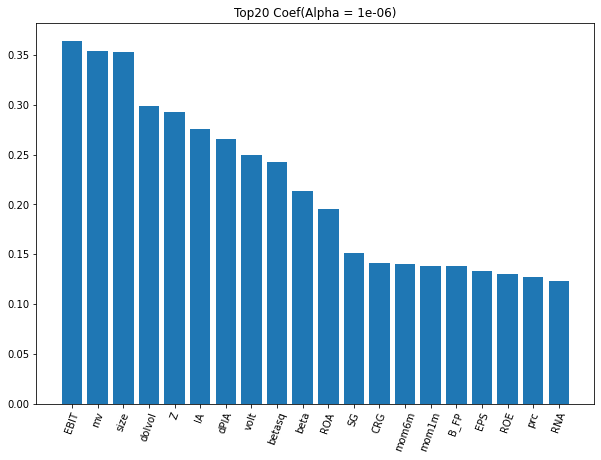

MSFE:  0.05849894061136813
R2: (Alpha = 1e-06) -1.1917589086166762


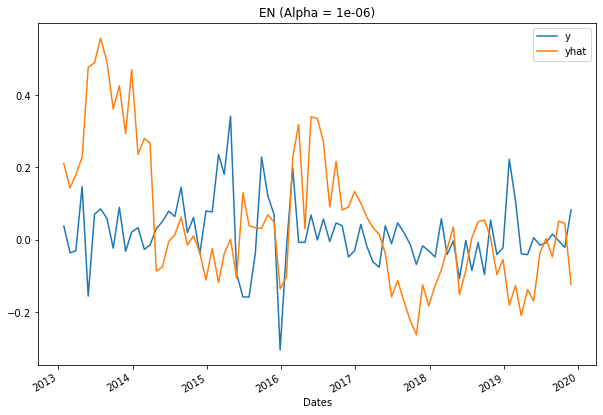

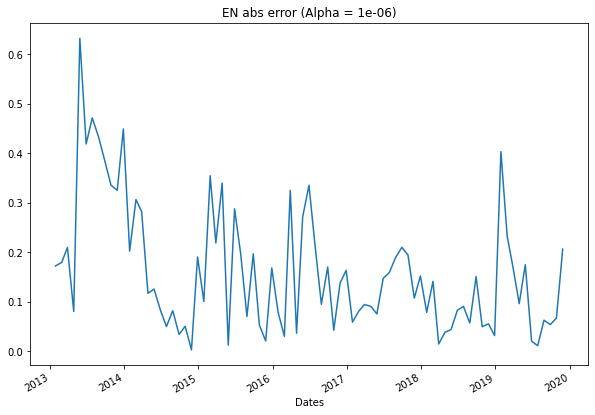

2017-01-28 00:00:00


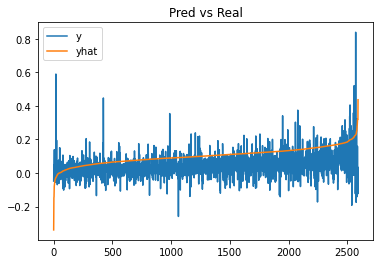

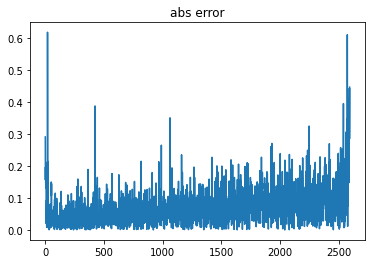

2019-07-28 00:00:00


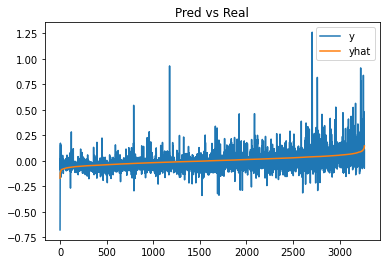

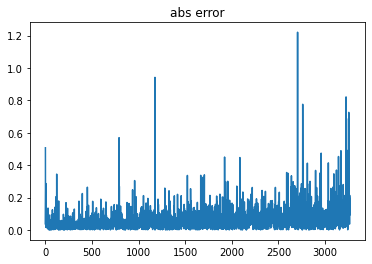

2019-06-28 00:00:00


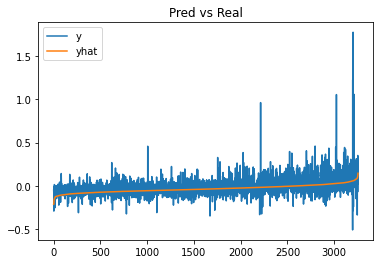

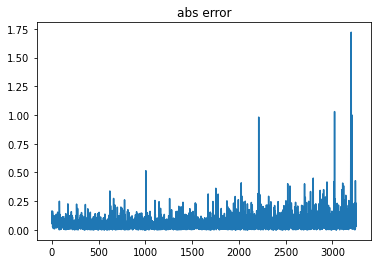

2018-12-28 00:00:00


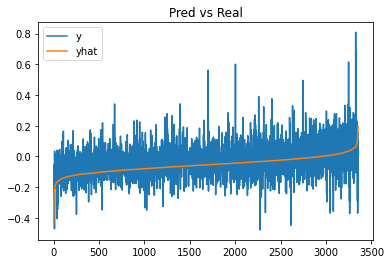

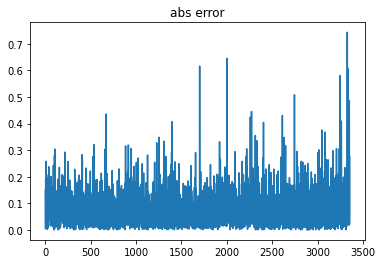

2018-03-28 00:00:00


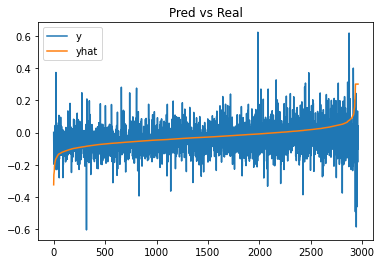

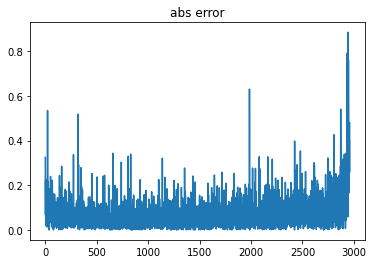

2014-09-28 00:00:00


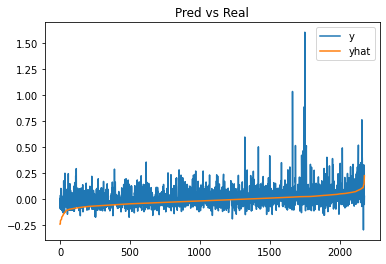

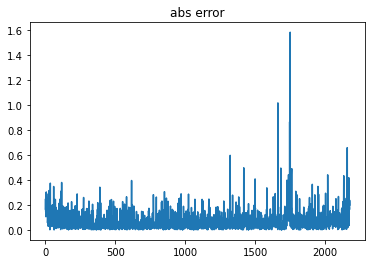

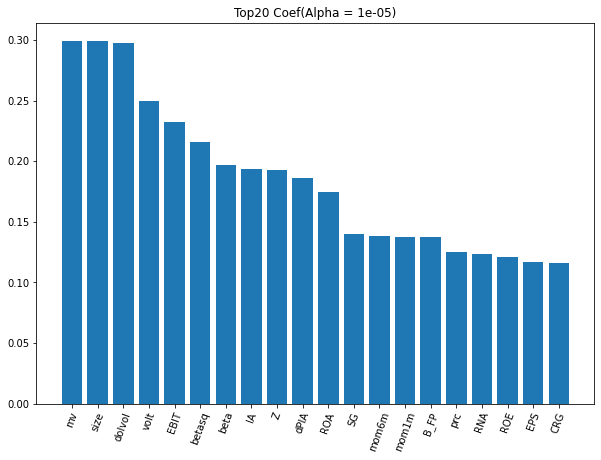

MSFE:  0.05613297887454343
R2: (Alpha = 1e-05) -1.1031142654840447


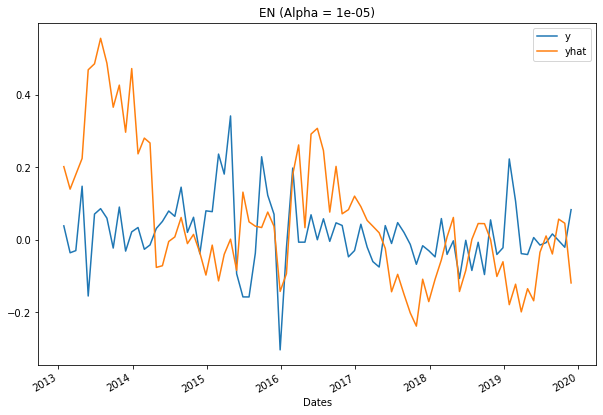

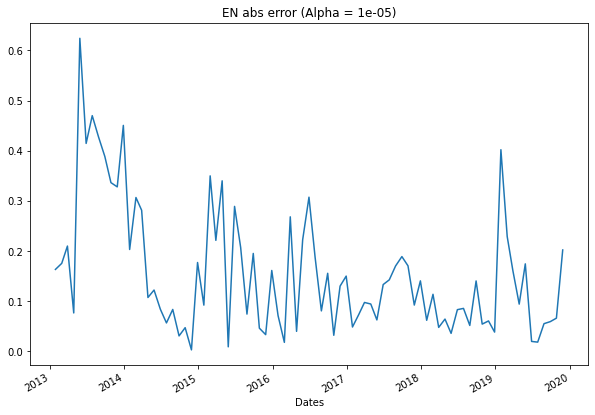

2017-01-28 00:00:00


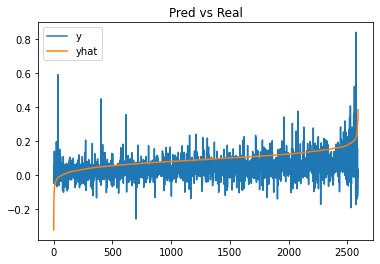

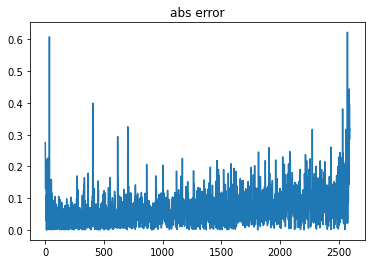

2019-07-28 00:00:00


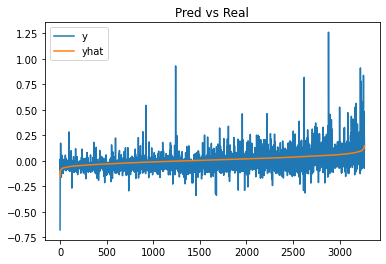

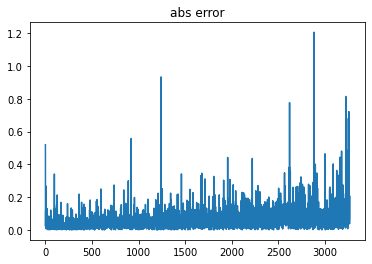

2019-06-28 00:00:00


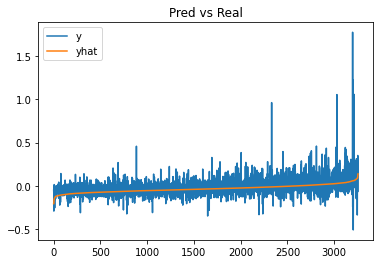

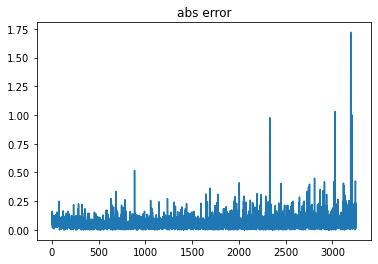

2018-12-28 00:00:00


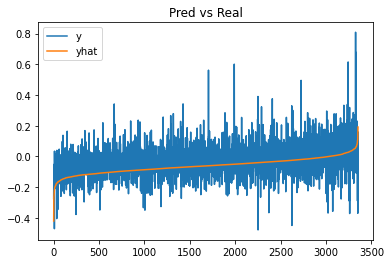

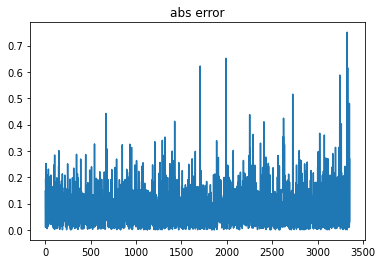

2019-08-28 00:00:00


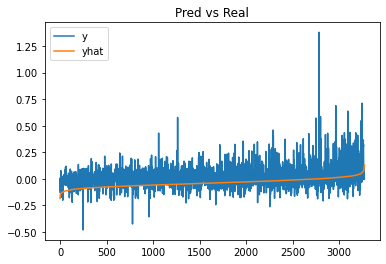

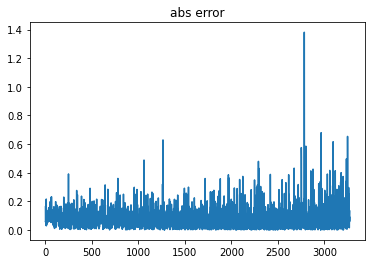

2018-08-28 00:00:00


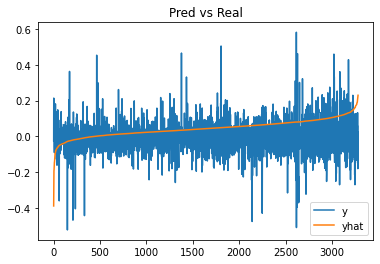

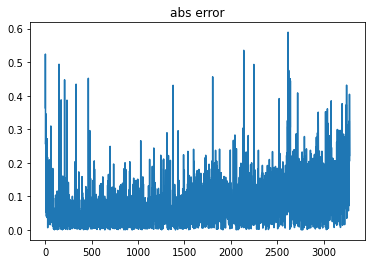

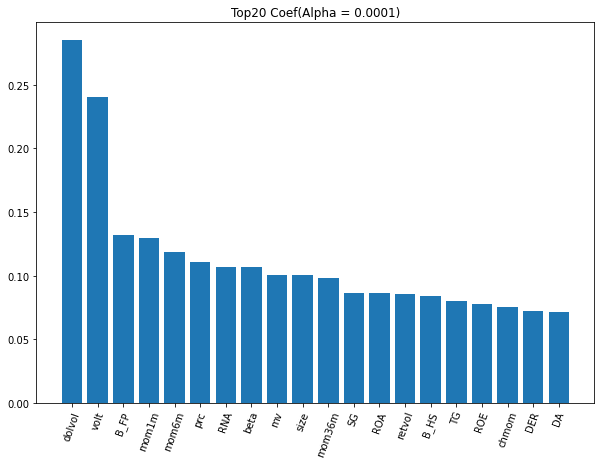

MSFE:  0.04318917354114366
R2: (Alpha = 0.0001) -0.6181533353477153


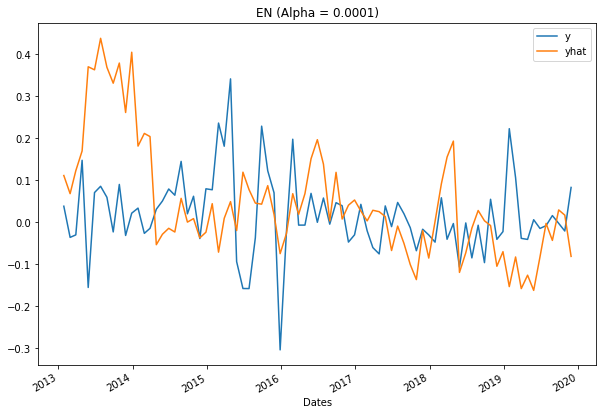

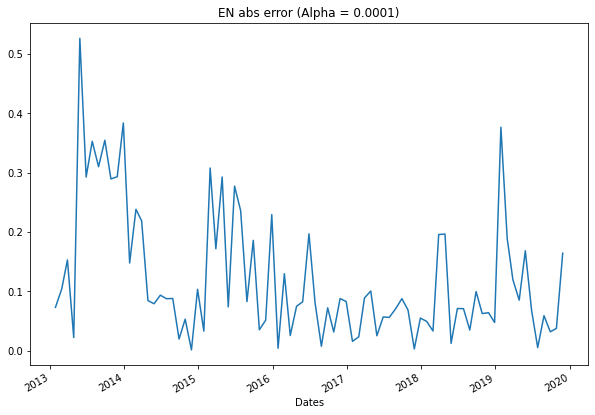

2017-01-28 00:00:00


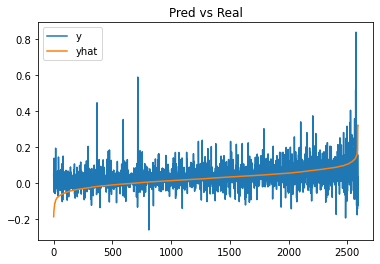

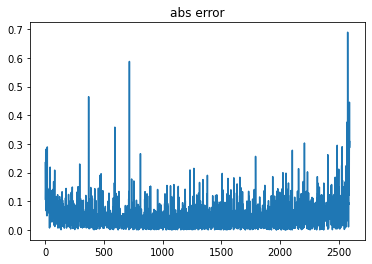

2017-02-28 00:00:00


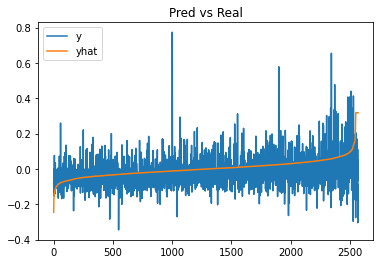

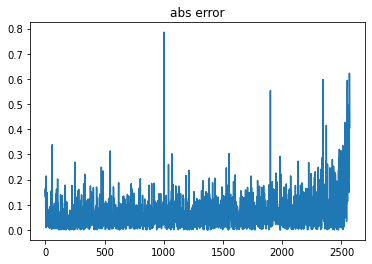

2019-07-28 00:00:00


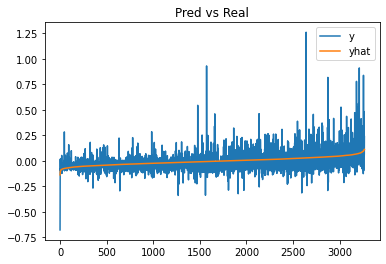

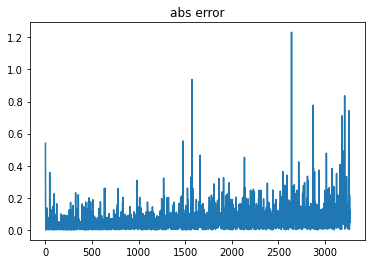

2019-10-28 00:00:00


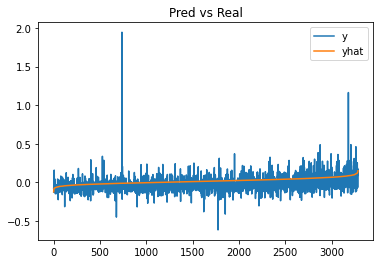

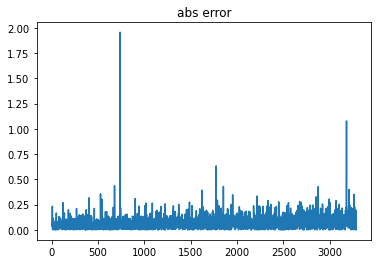

2015-01-28 00:00:00


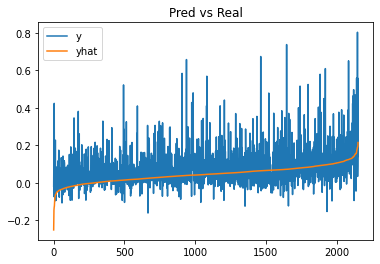

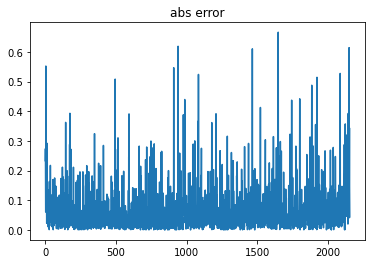

2018-08-28 00:00:00


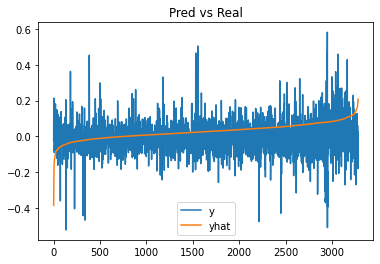

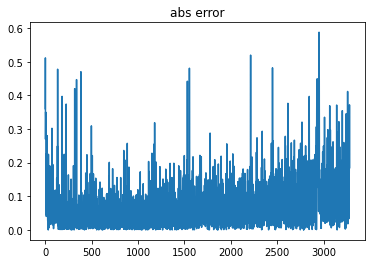

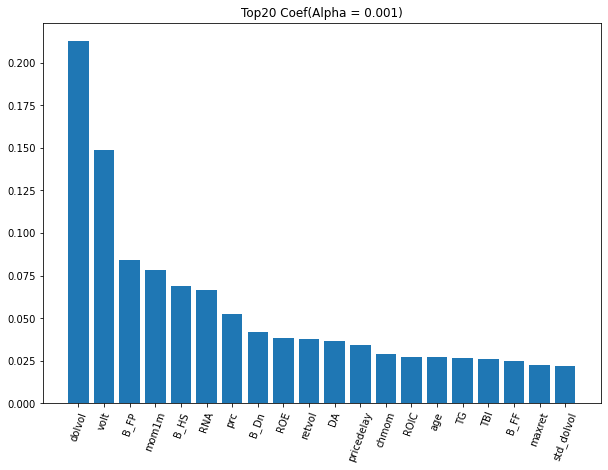

MSFE:  0.02862685499286016
R2: (Alpha = 0.001) -0.07255214881765082


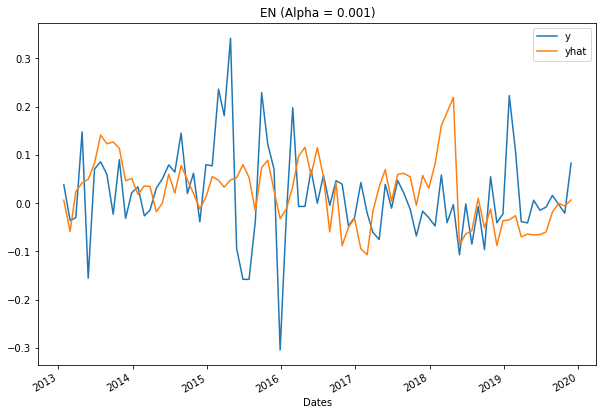

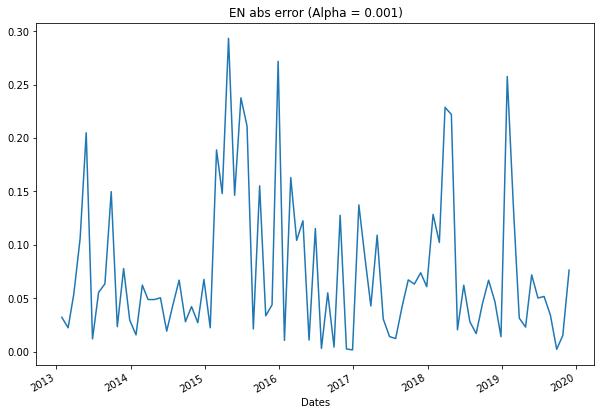

2016-12-28 00:00:00


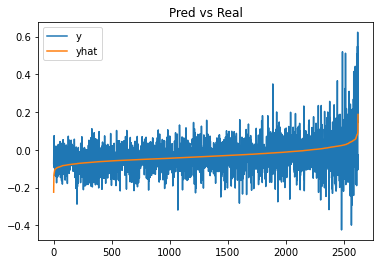

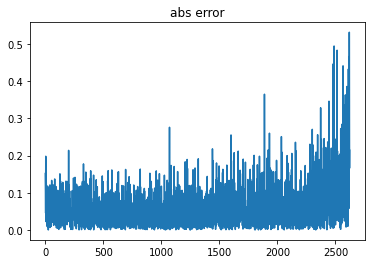

2013-01-28 00:00:00


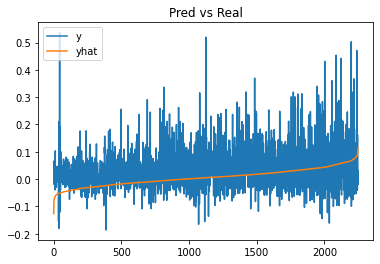

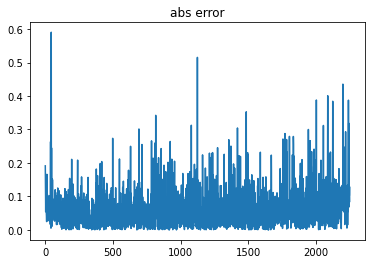

2018-08-28 00:00:00


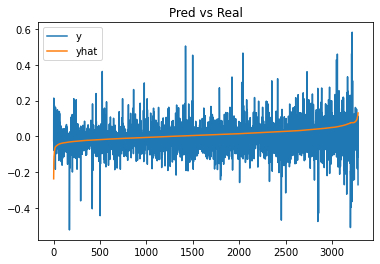

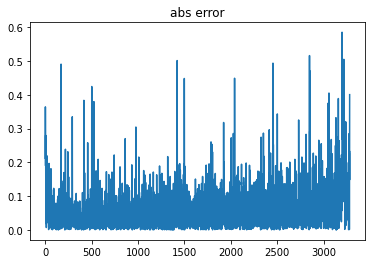

2019-10-28 00:00:00


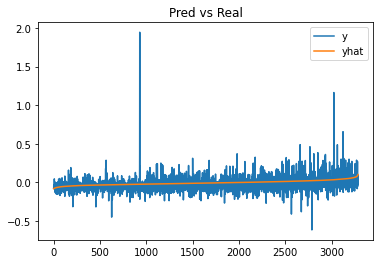

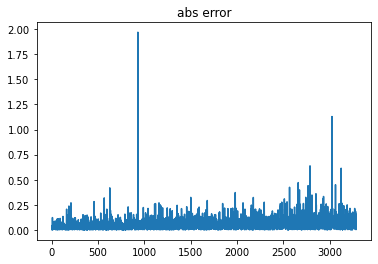

2015-01-28 00:00:00


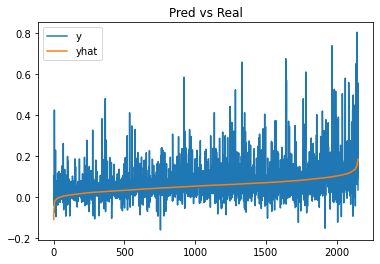

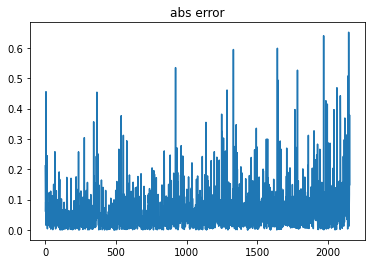

2018-12-28 00:00:00


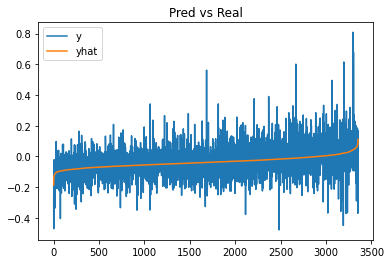

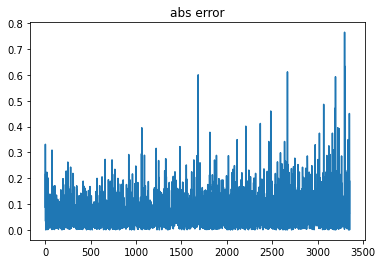

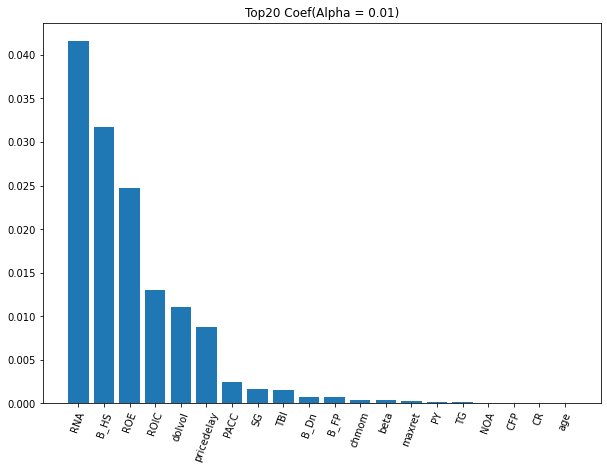

MSFE:  0.028732445624914917
R2: (Alpha = 0.01) -0.07650827530564941


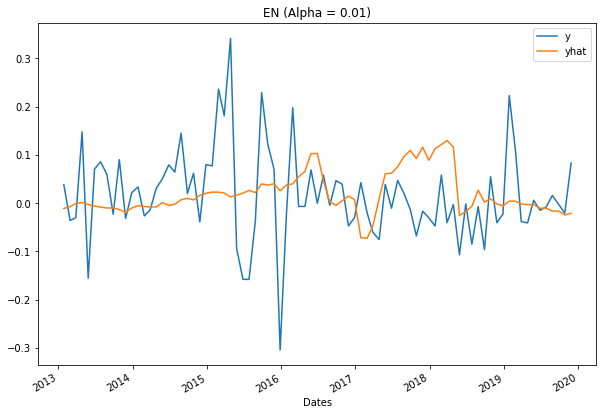

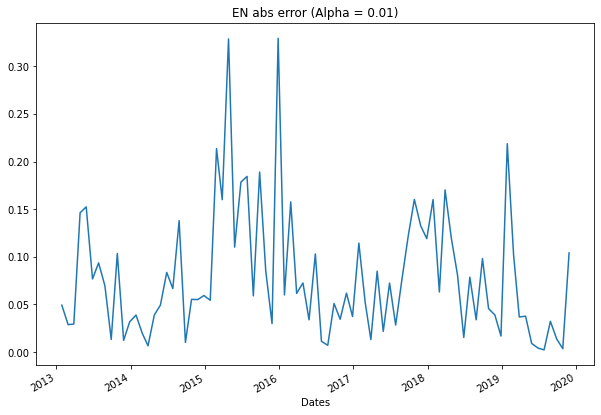

2019-05-28 00:00:00


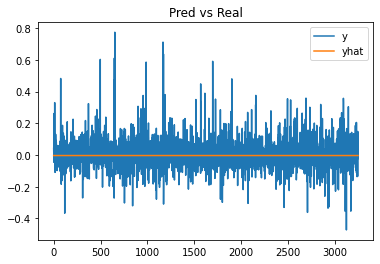

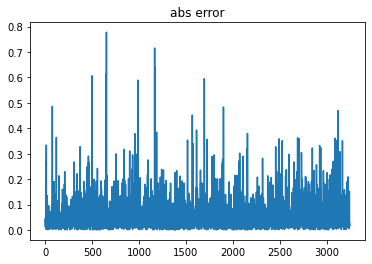

2018-08-28 00:00:00


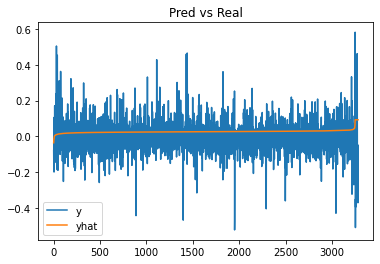

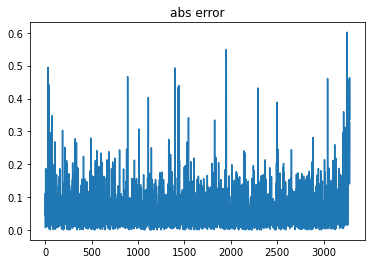

2013-01-28 00:00:00


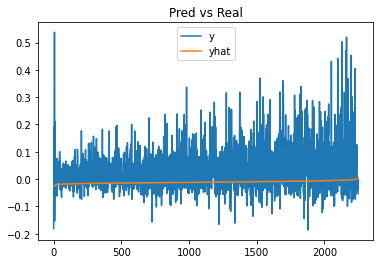

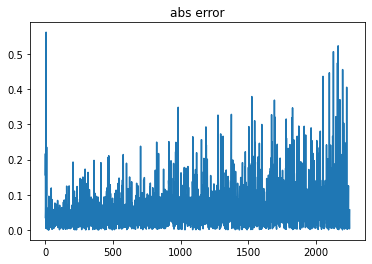

2013-03-28 00:00:00


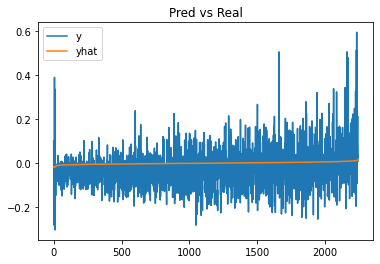

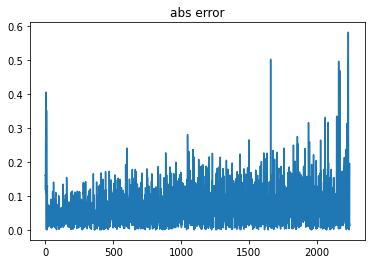

2016-12-28 00:00:00


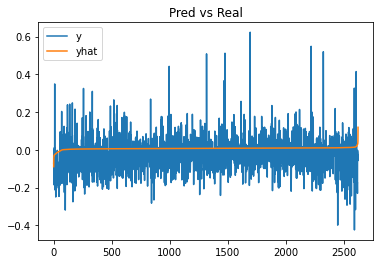

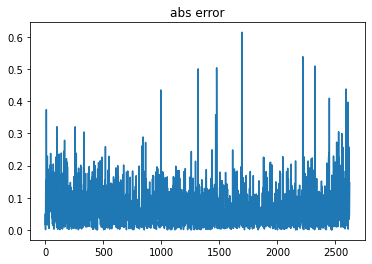

2019-10-28 00:00:00


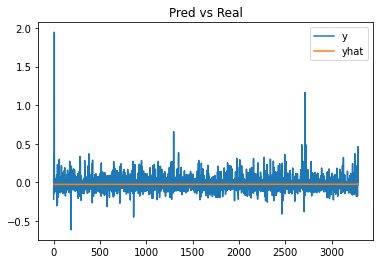

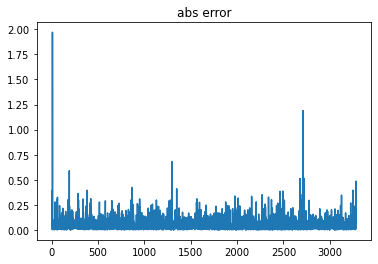

In [8]:
# deal with EN
all_pred = []
all_best = []
all_coef = []
for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        result_idx = i - (train_month_n + test_month_n + oos_month_n - 1)
        oos_month = all_month_list[i]
        
        temp_tuning = en_op[result_idx][0]
        temp_best = en_op[result_idx][1]
        temp_coef = en_op[result_idx][2]
        
        all_best.append(temp_best)
        
        temp_coef = pd.DataFrame(temp_coef).T
        temp_coef['AlphaValue'] = temp_coef.index
        temp_coef['Dates'] = oos_month
        all_coef.append(temp_coef)
        all_pred.append(temp_tuning)
        
        
all_pred = pd.concat(all_pred)

all_pred['Dates'] = [datetime.datetime(year = int(x//100),month = int(x%100),day = 28) for x in all_pred['Dates']]
all_pred = all_pred.sort_values(['AlphaValue','Dates'])
all_pred = all_pred.set_index(['AlphaValue','Dates'])
        
     
all_coef = pd.concat(all_coef)
all_coef = all_coef.sort_values(['AlphaValue','Dates'])
all_coef = all_coef.set_index(['AlphaValue','Dates'])



alphas = [1e-6,1e-5,1e-4, 1e-3, 1e-2]
for alpha_v in alphas:
    alpha_coef = all_coef.loc[alpha_v]
    plt.figure(figsize = (10,7))
    abs_coef = abs(alpha_coef).mean()
    toplot_coef = abs_coef.sort_values(ascending = False).head(20)
    plt.bar(x = list(toplot_coef.index), height = toplot_coef.values)
    plt.xticks(rotation=70)
    plt.title('Top20 Coef(Alpha = %s)'%alpha_v)
    plt.show()
    
    alpha_pred = all_pred.loc[alpha_v]
    pred_toplot = alpha_pred.copy().reset_index()
    msfe_monthly = alpha_pred.groupby('Dates').apply(lambda x: np.sum((x['yhat']-x['y'])**2) / len(x) )
    

    msfe = np.sum((alpha_pred['yhat']-alpha_pred['y'])**2) / len(alpha_pred)
    print('MSFE: ', msfe)
    r2 = 1-np.sum((alpha_pred['yhat']-alpha_pred['y'])**2)/np.sum(alpha_pred['y']**2)
    print('R2: (Alpha = %s)'%alpha_v, r2)
    alpha_pred = alpha_pred.groupby('Dates').apply(lambda x: x.mean()[['y','yhat']])
    alpha_pred[['y','yhat']].plot(figsize = (10,7),title = 'EN (Alpha = %s)'%alpha_v)
    
    plt.show()
    
    abs(alpha_pred['y']- alpha_pred['yhat']).plot(figsize = (10,7),title = 'EN abs error (Alpha = %s)'%alpha_v)
    plt.show()  
    
    head_mse = msfe_monthly.sort_values().head(6)
    head_month = list(head_mse.index)


    for m in head_month:
        print(m)
        m_pred = pred_toplot[pred_toplot['Dates'] == m]
        m_pred = m_pred.sort_values('yhat')
        m_pred['y'].reset_index(drop = True).plot()
        m_pred['yhat'].reset_index(drop = True).plot(title = 'Pred vs Real')
        plt.legend()
        plt.show()    
        abs(m_pred['y'] -m_pred['yhat']).reset_index(drop = True).plot(title = 'abs error')


        plt.show()


# Ridge

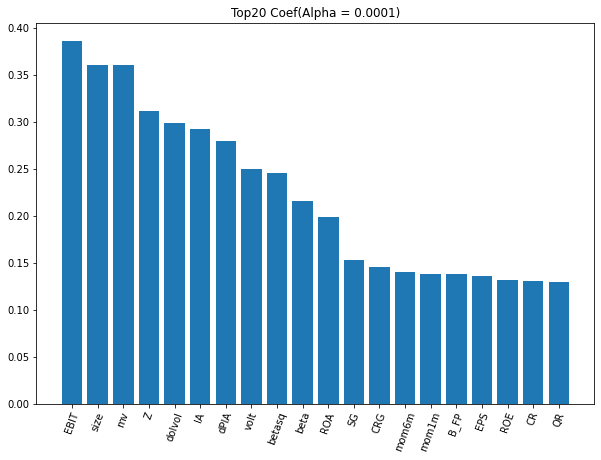

MSFE:  0.05879981772564947
R2: (Alpha = 0.0001) -1.2030317639664165


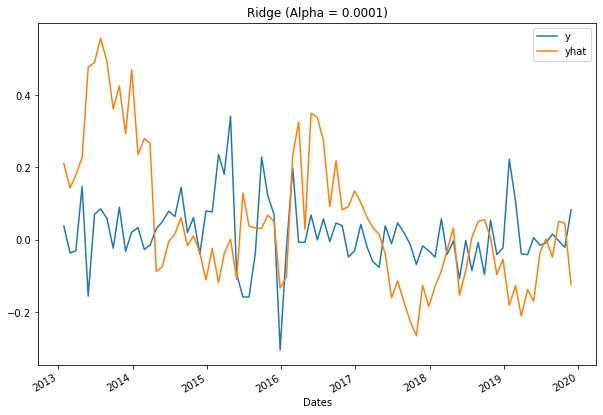

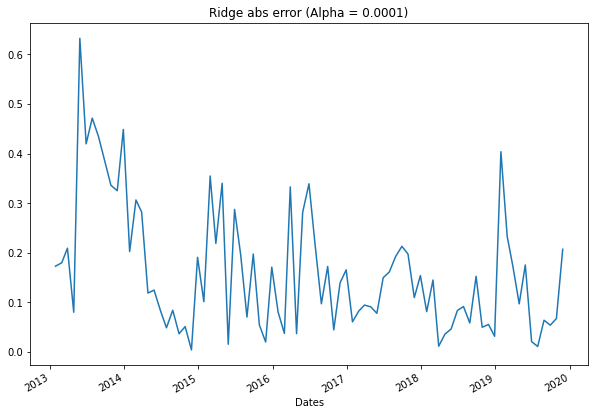

2019-05-28 00:00:00


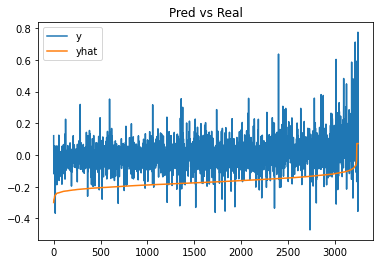

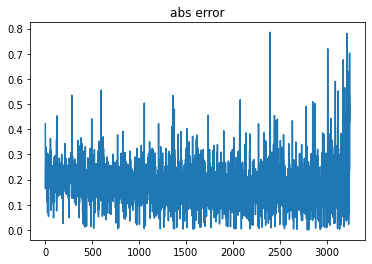

2018-08-28 00:00:00


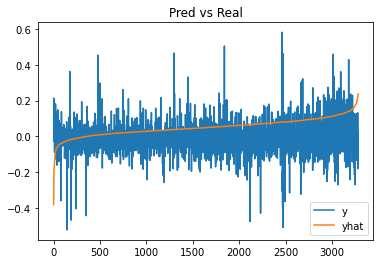

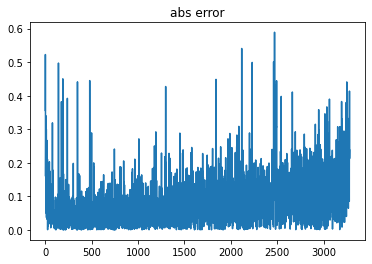

2013-01-28 00:00:00


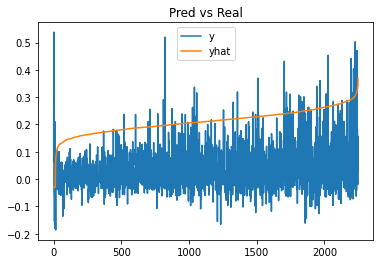

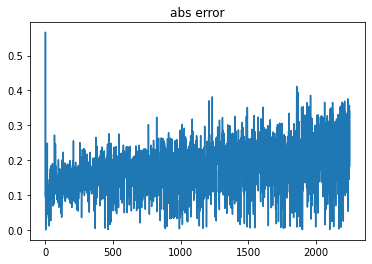

2013-03-28 00:00:00


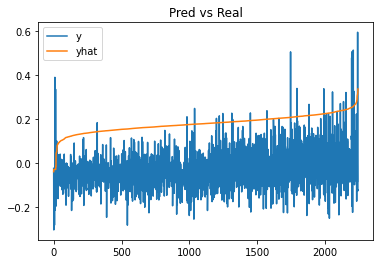

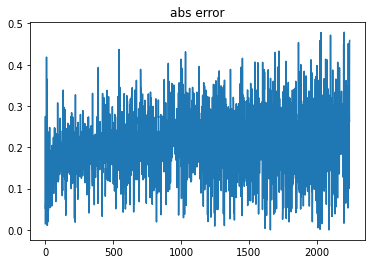

2016-12-28 00:00:00


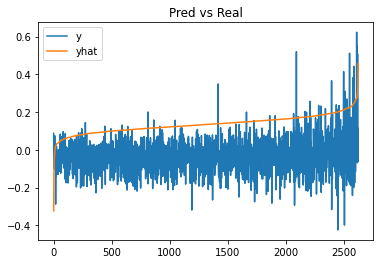

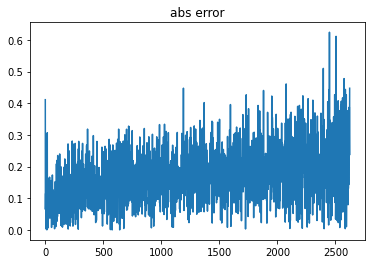

2019-10-28 00:00:00


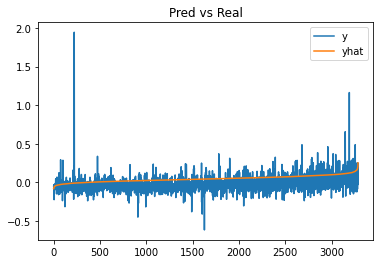

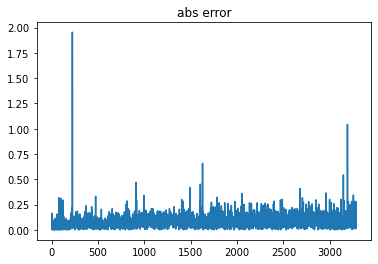

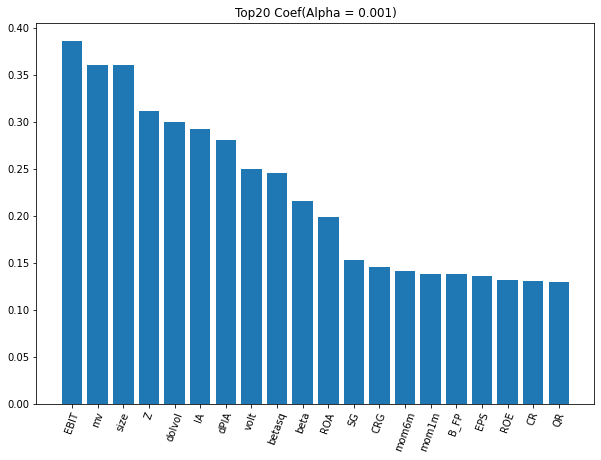

MSFE:  0.058797151054753694
R2: (Alpha = 0.001) -1.2029318527606567


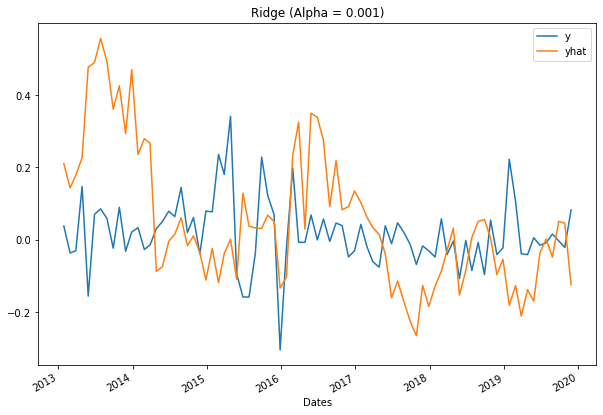

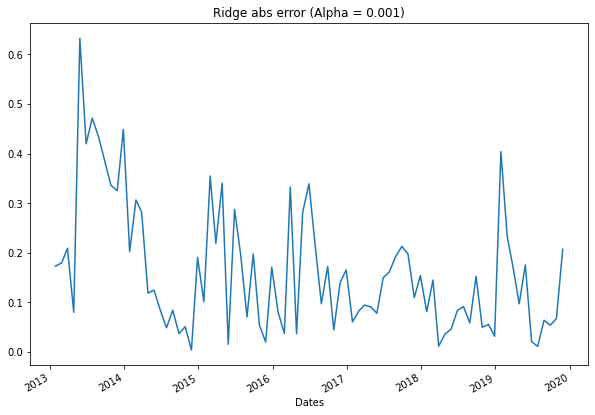

2019-05-28 00:00:00


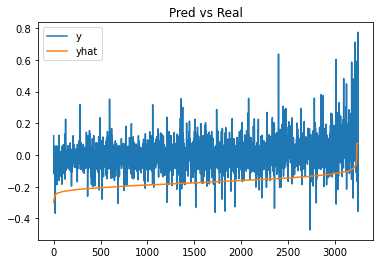

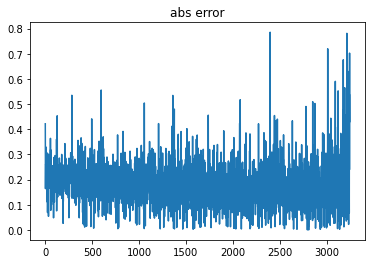

2018-08-28 00:00:00


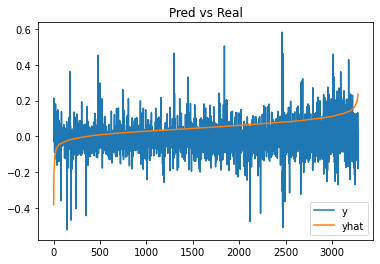

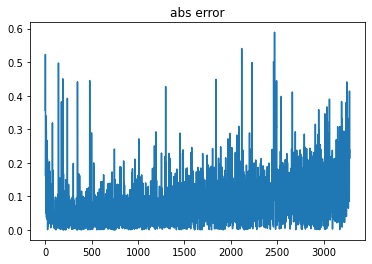

2013-01-28 00:00:00


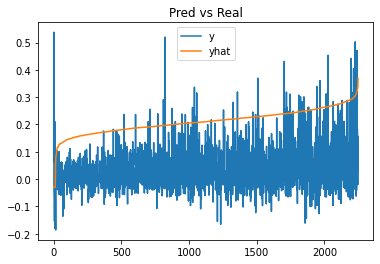

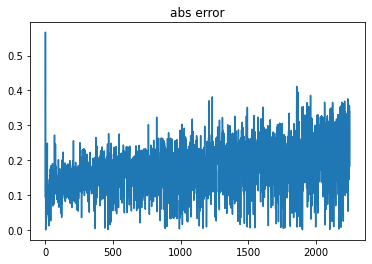

2013-03-28 00:00:00


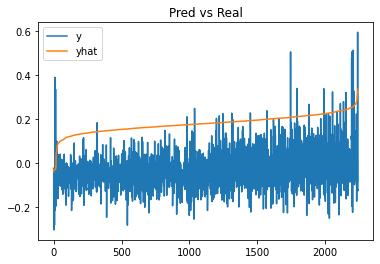

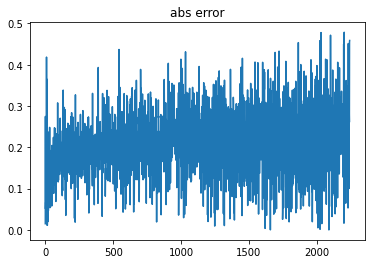

2016-12-28 00:00:00


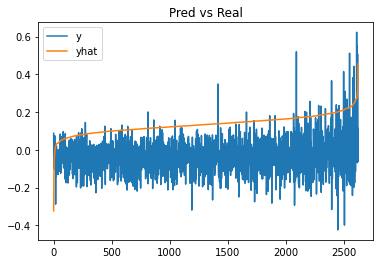

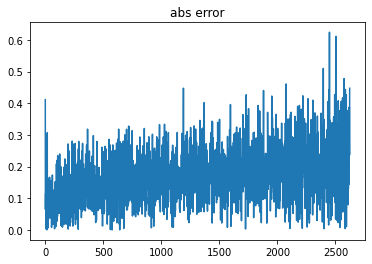

2019-10-28 00:00:00


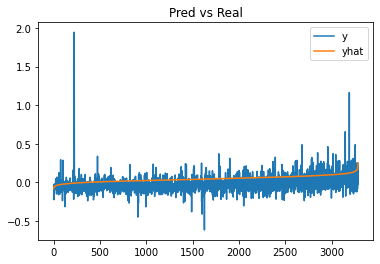

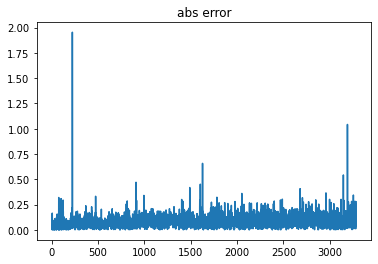

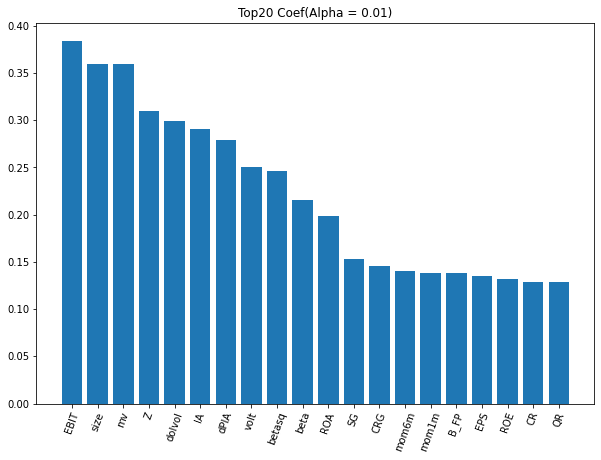

MSFE:  0.05877049382422897
R2: (Alpha = 0.01) -1.2019330958281205


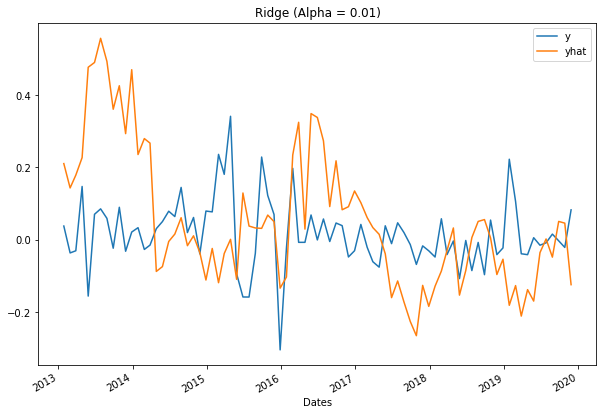

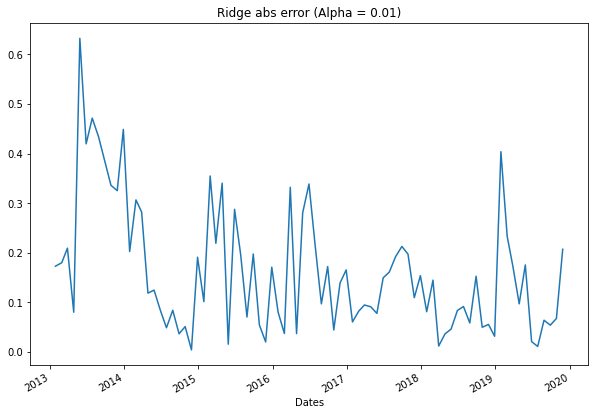

2019-05-28 00:00:00


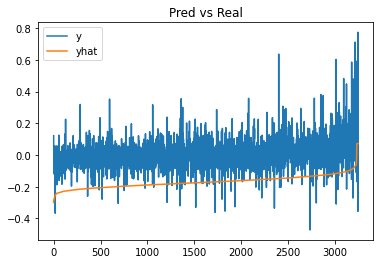

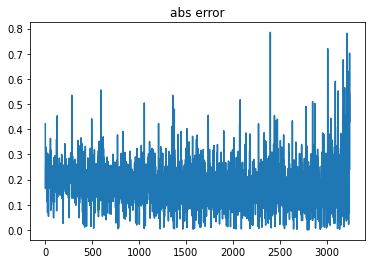

2018-08-28 00:00:00


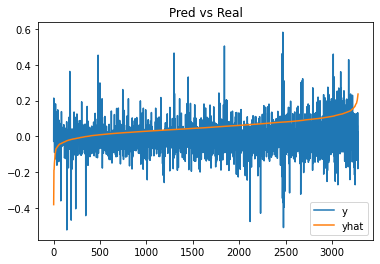

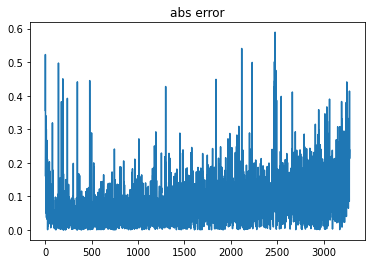

2013-01-28 00:00:00


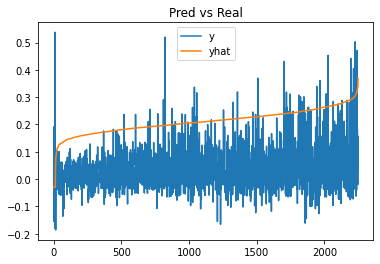

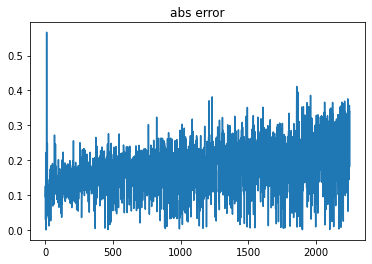

2013-03-28 00:00:00


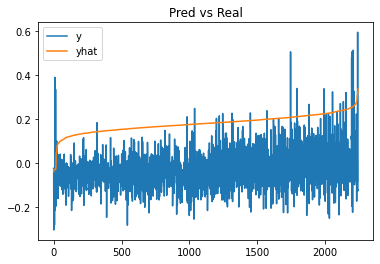

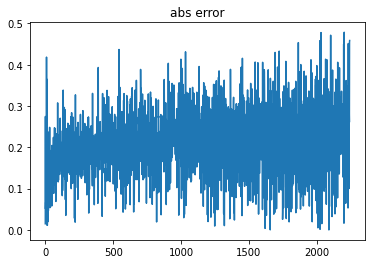

2016-12-28 00:00:00


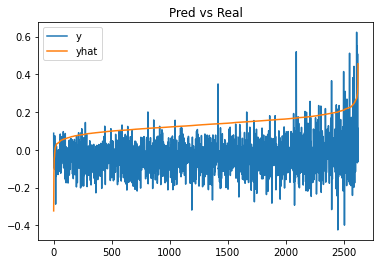

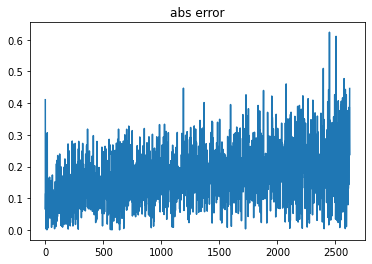

2019-10-28 00:00:00


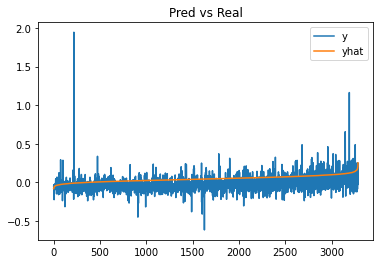

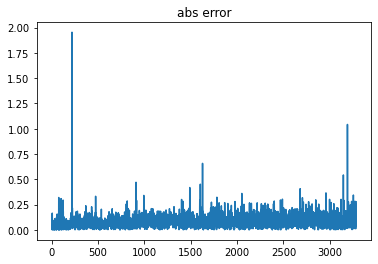

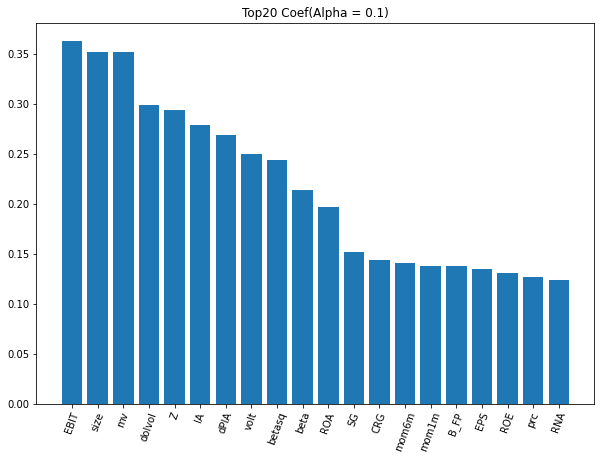

MSFE:  0.05850496068385848
R2: (Alpha = 0.1) -1.1919844605219474


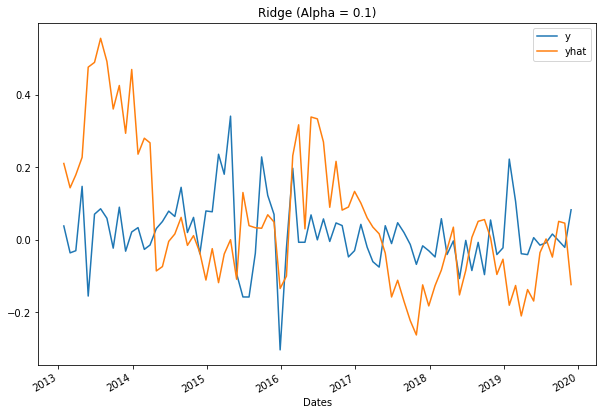

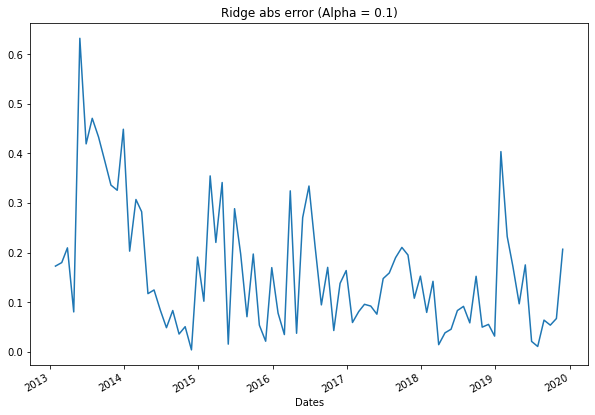

2019-05-28 00:00:00


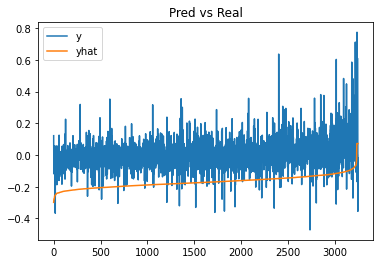

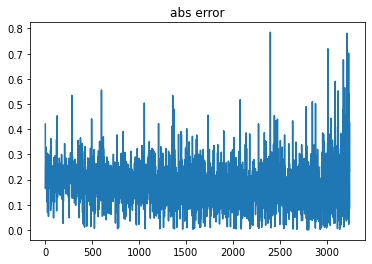

2018-08-28 00:00:00


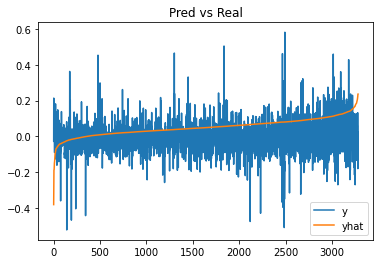

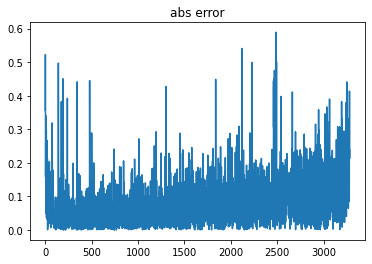

2013-01-28 00:00:00


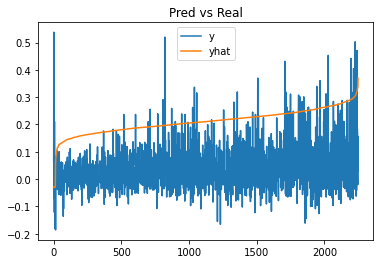

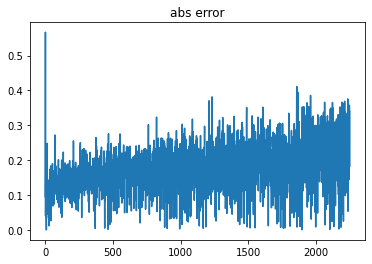

2013-03-28 00:00:00


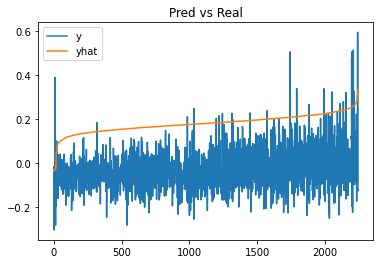

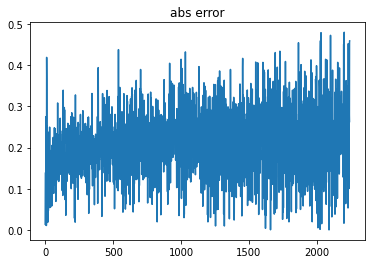

2016-12-28 00:00:00


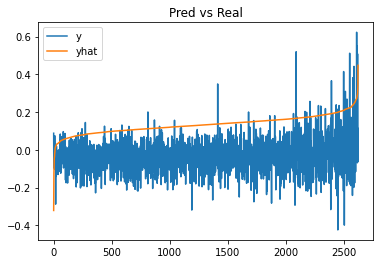

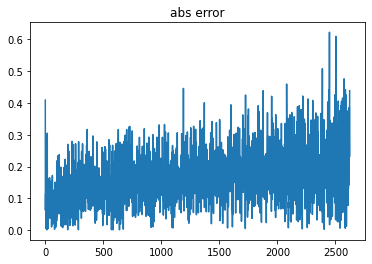

2019-10-28 00:00:00


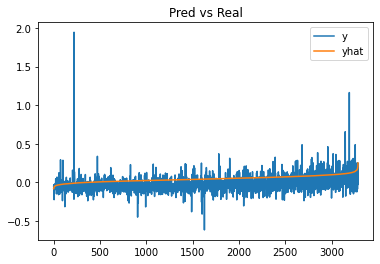

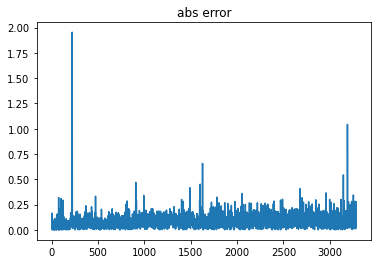

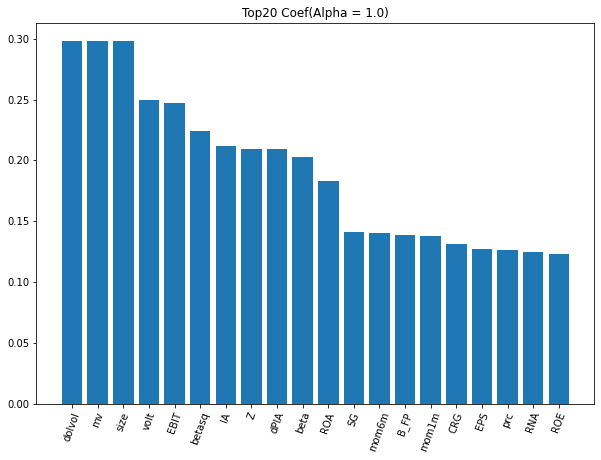

MSFE:  0.0561550500643513
R2: (Alpha = 1.0) -1.1039411988674463


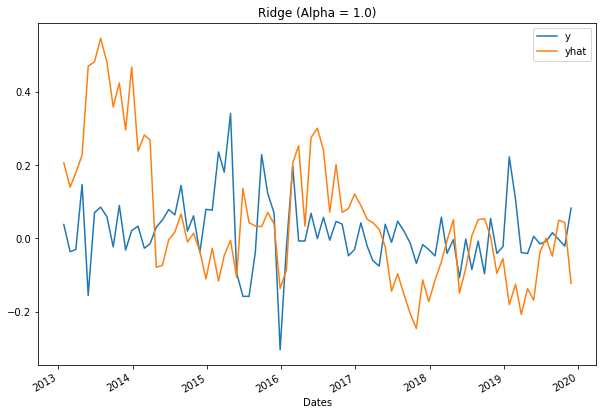

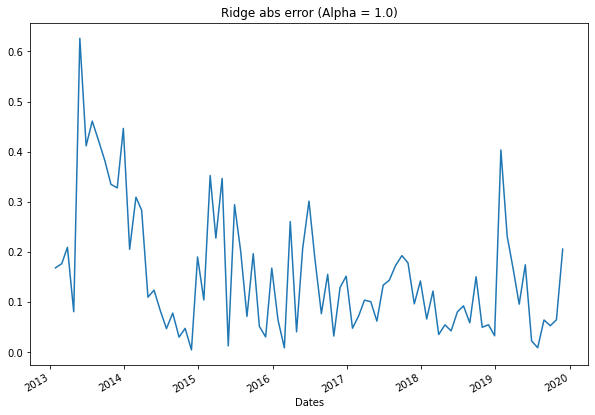

2019-05-28 00:00:00


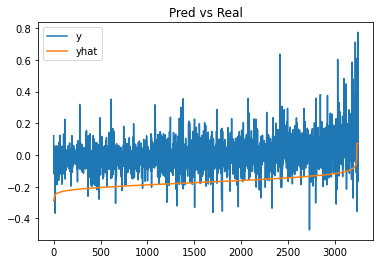

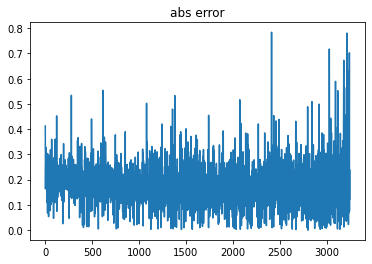

2018-08-28 00:00:00


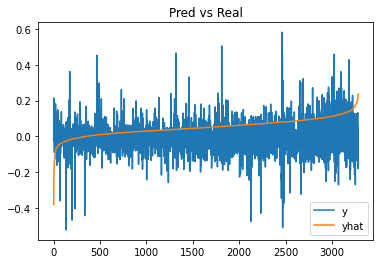

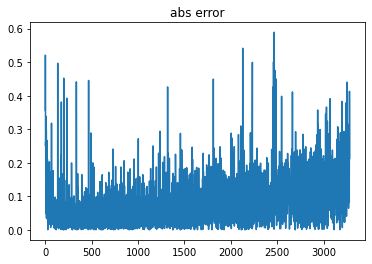

2013-01-28 00:00:00


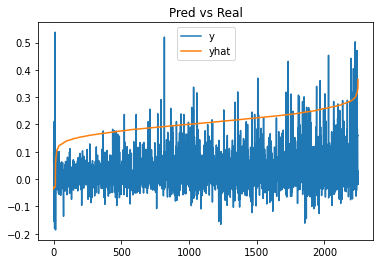

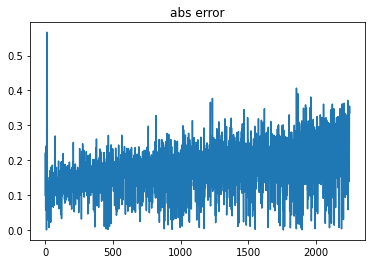

2013-03-28 00:00:00


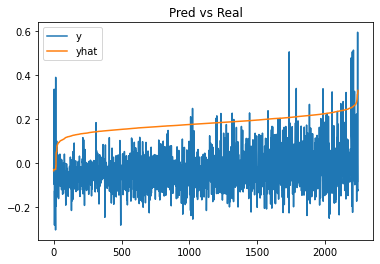

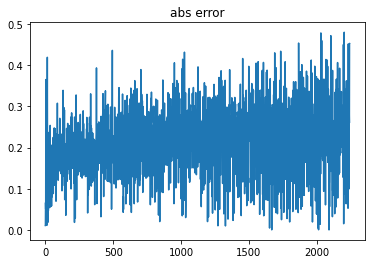

2016-12-28 00:00:00


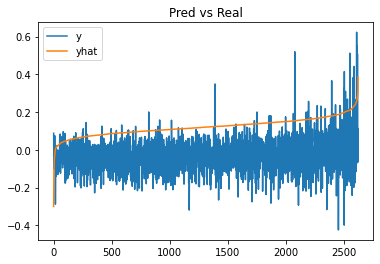

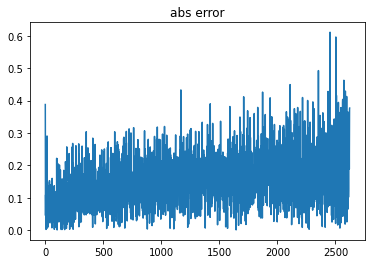

2019-10-28 00:00:00


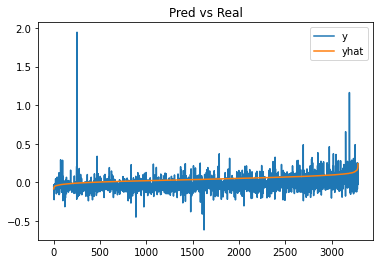

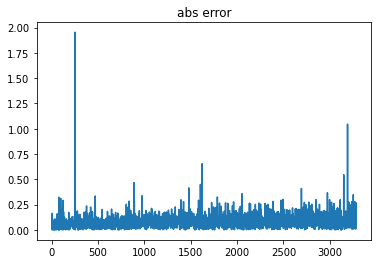

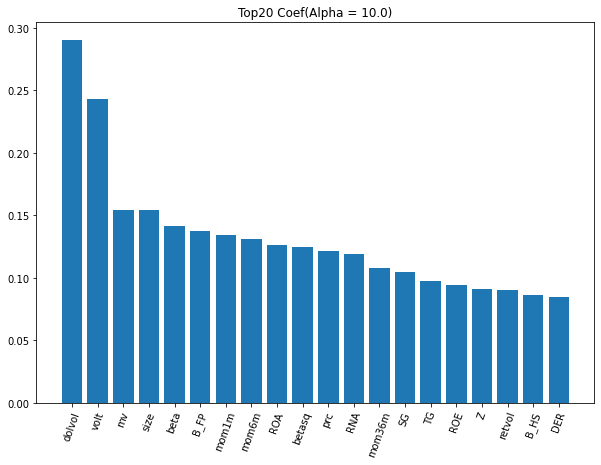

MSFE:  0.04648052943460166
R2: (Alpha = 10.0) -0.7414693907415921


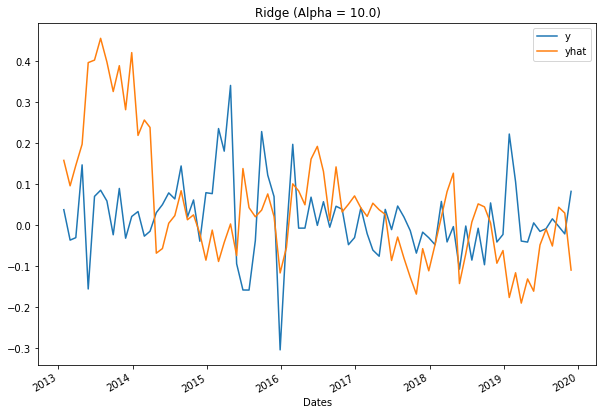

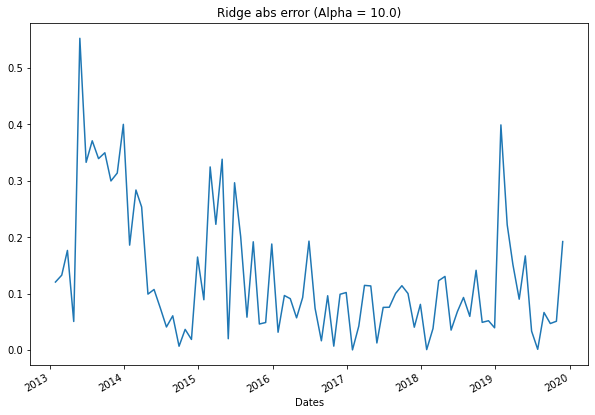

2019-05-28 00:00:00


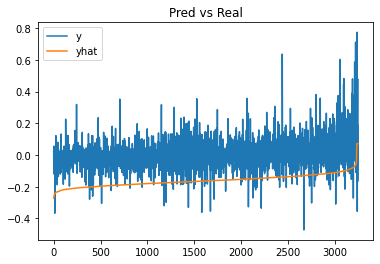

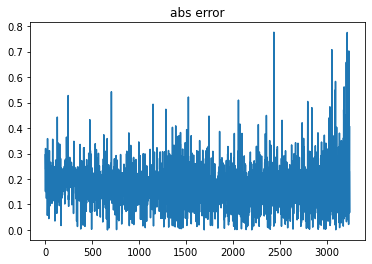

2018-08-28 00:00:00


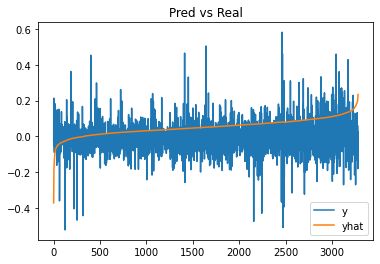

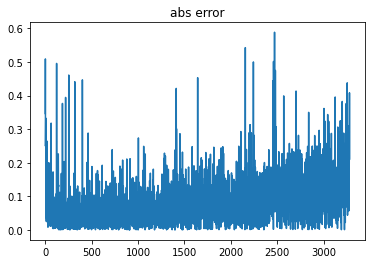

2013-01-28 00:00:00


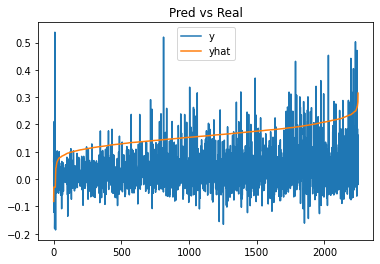

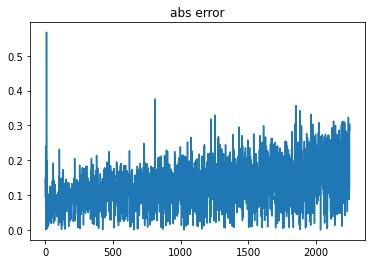

2013-03-28 00:00:00


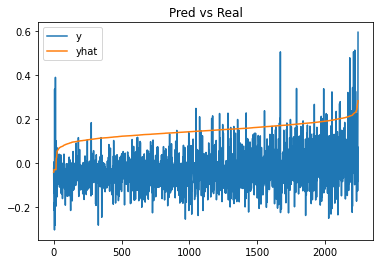

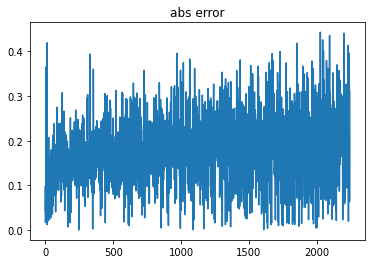

2016-12-28 00:00:00


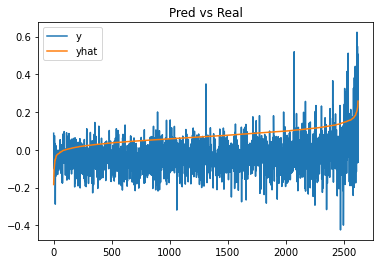

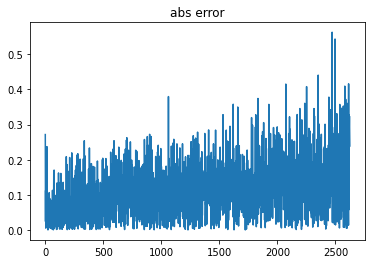

2019-10-28 00:00:00


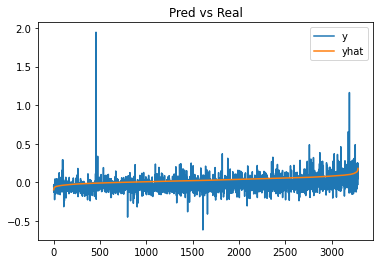

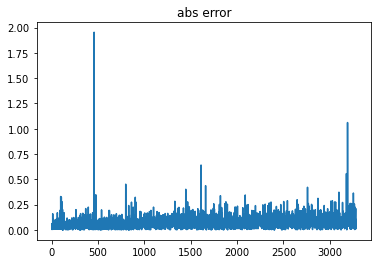

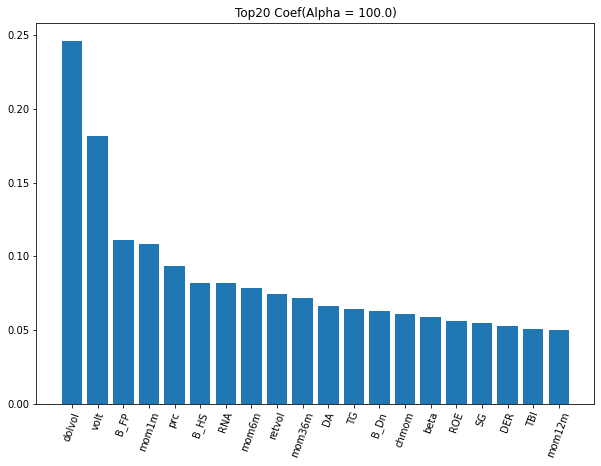

MSFE:  0.032979866724922924
R2: (Alpha = 100.0) -0.23564488423049368


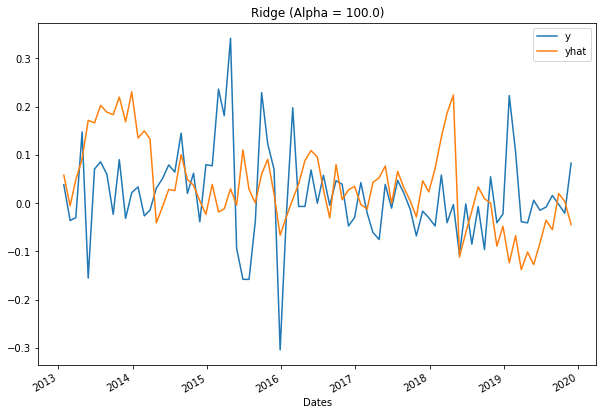

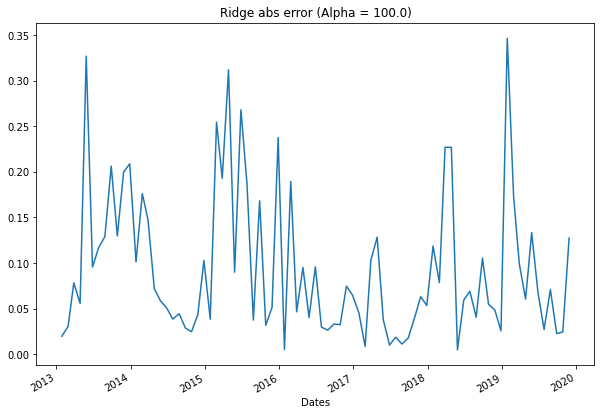

2019-05-28 00:00:00


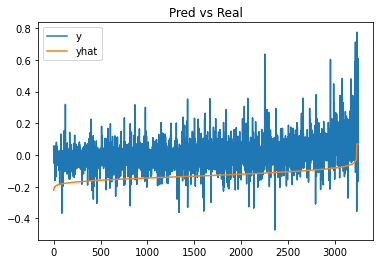

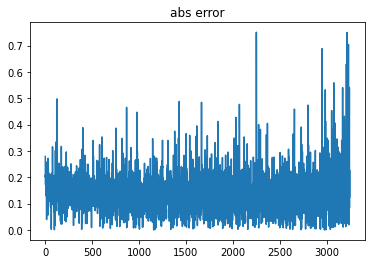

2018-08-28 00:00:00


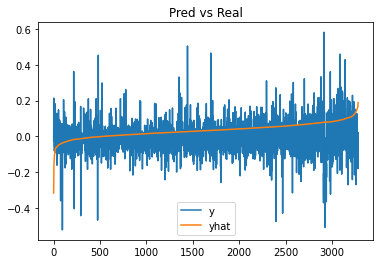

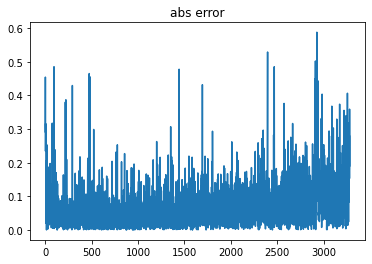

2013-01-28 00:00:00


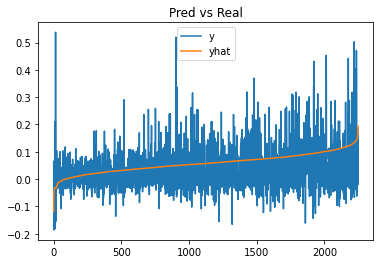

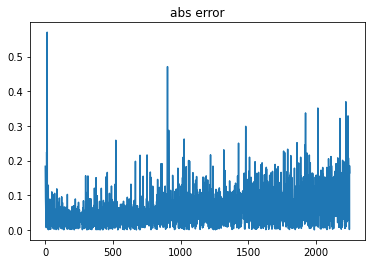

2013-03-28 00:00:00


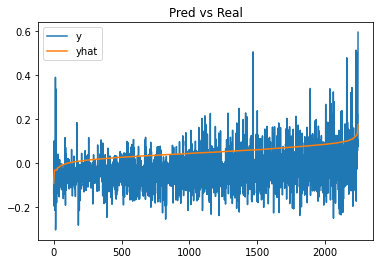

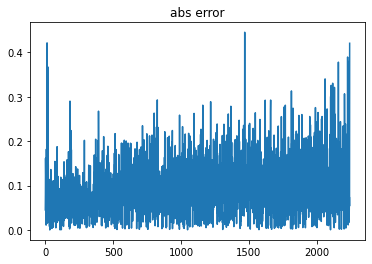

2016-12-28 00:00:00


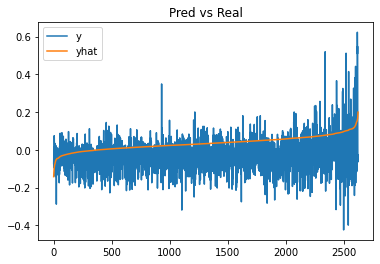

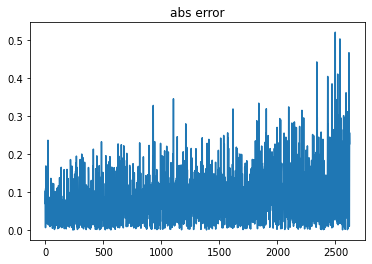

2019-10-28 00:00:00


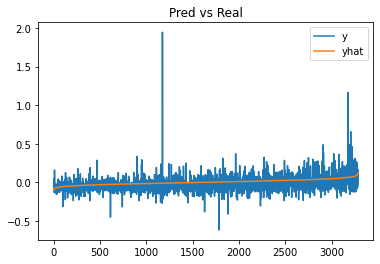

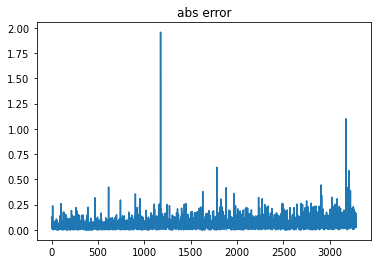

In [9]:
# deal with Ridge
all_pred = []
all_best = []
all_coef = []
for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        result_idx = i - (train_month_n + test_month_n + oos_month_n - 1)
        oos_month = all_month_list[i]
        
        temp_tuning = ridge_op[result_idx][0]
        temp_best = ridge_op[result_idx][1]
        temp_coef = ridge_op[result_idx][2]
        
        all_best.append(temp_best)
        
        temp_coef = pd.DataFrame(temp_coef).T
        temp_coef['AlphaValue'] = temp_coef.index
        temp_coef['Dates'] = oos_month
        all_coef.append(temp_coef)
        all_pred.append(temp_tuning)
        
        
all_pred = pd.concat(all_pred)
all_pred['Dates'] = [datetime.datetime(year = int(x//100),month = int(x%100),day = 28) for x in all_pred['Dates']]
all_pred = all_pred.sort_values(['AlphaValue','Dates'])
all_pred = all_pred.set_index(['AlphaValue','Dates'])
        
     
all_coef = pd.concat(all_coef)
all_coef = all_coef.sort_values(['AlphaValue','Dates'])
all_coef = all_coef.set_index(['AlphaValue','Dates'])



alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e-0, 1e1, 1e2]
for alpha_v in alphas:
    alpha_coef = all_coef.loc[alpha_v]
    plt.figure(figsize = (10,7))
    abs_coef = abs(alpha_coef).mean()
    toplot_coef = abs_coef.sort_values(ascending = False).head(20)
    plt.bar(x = list(toplot_coef.index), height = toplot_coef.values)
    plt.xticks(rotation=70)
    plt.title('Top20 Coef(Alpha = %s)'%alpha_v)
    plt.show()
    
    alpha_pred = all_pred.loc[alpha_v]
    pred_toplot = alpha_pred.copy().reset_index()
    
    msfe = np.sum((alpha_pred['yhat']-alpha_pred['y'])**2) / len(alpha_pred)
    print('MSFE: ', msfe)
    r2 = 1-np.sum((alpha_pred['yhat']-alpha_pred['y'])**2)/np.sum(alpha_pred['y']**2)
    print('R2: (Alpha = %s)'%alpha_v, r2)
    
    
    
    alpha_pred = alpha_pred.groupby('Dates').apply(lambda x: x.mean()[['y','yhat']])

    alpha_pred[['y','yhat']].plot(figsize = (10,7),title = 'Ridge (Alpha = %s)'%alpha_v)
    plt.show()
    
    abs(alpha_pred['y']- alpha_pred['yhat']).plot(figsize = (10,7),title = 'Ridge abs error (Alpha = %s)'%alpha_v)
    plt.show()  
    
    head_mse = msfe_monthly.sort_values().head(6)
    head_month = list(head_mse.index)


    for m in head_month:
        print(m)
        m_pred = pred_toplot[pred_toplot['Dates'] == m]
        m_pred = m_pred.sort_values('yhat')
        m_pred['y'].reset_index(drop = True).plot()
        m_pred['yhat'].reset_index(drop = True).plot(title = 'Pred vs Real')
        plt.legend()
        plt.show()    
        abs(m_pred['y'] -m_pred['yhat']).reset_index(drop = True).plot(title = 'abs error')


        plt.show()


# Lasso

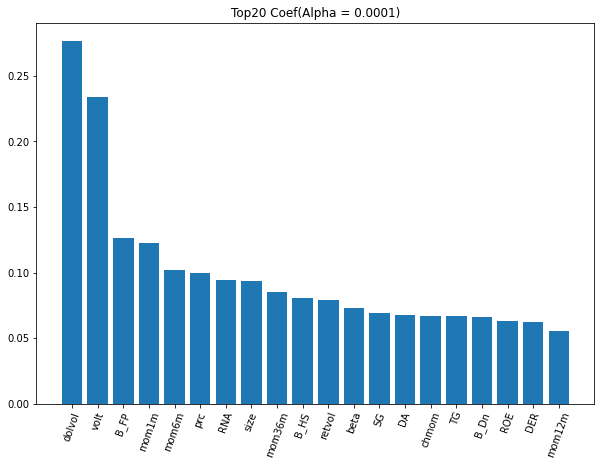

MSFE:  0.03928733824503327
R2: (Alpha = 0.0001) -0.4719646662738852


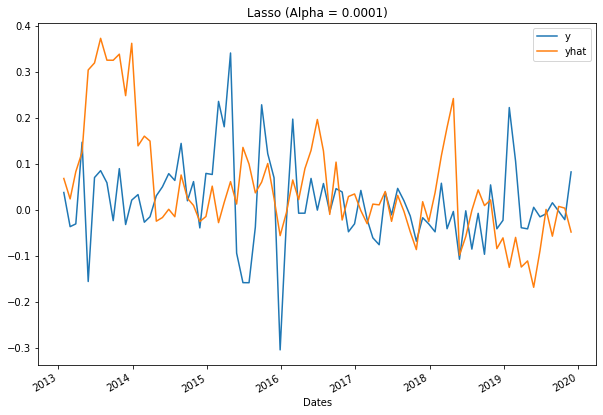

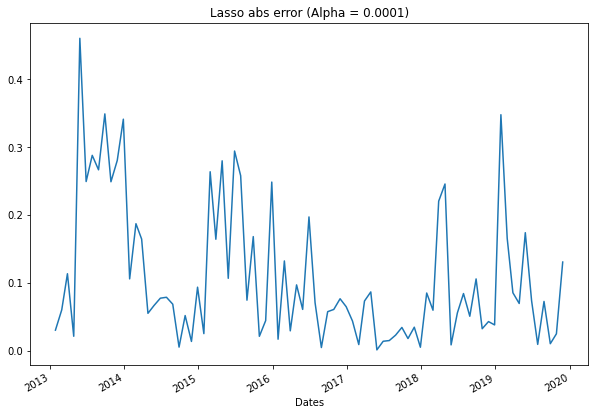

2019-05-28 00:00:00


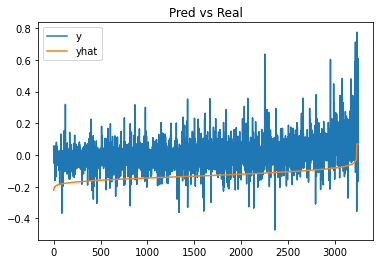

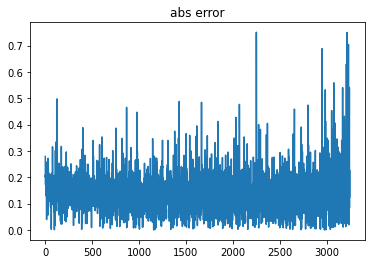

2018-08-28 00:00:00


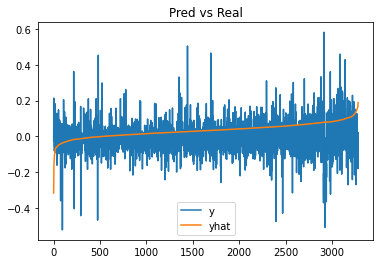

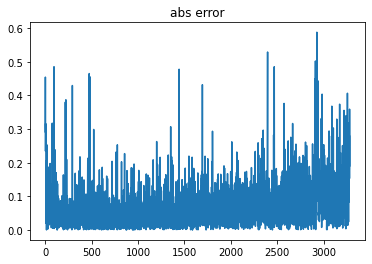

2013-01-28 00:00:00


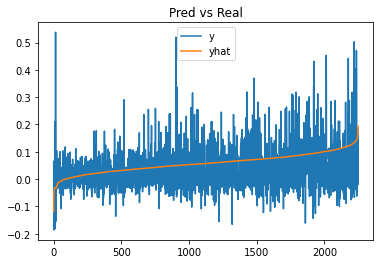

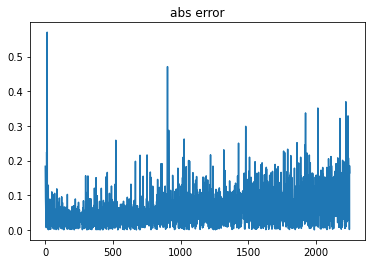

2013-03-28 00:00:00


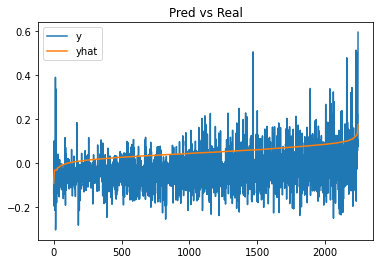

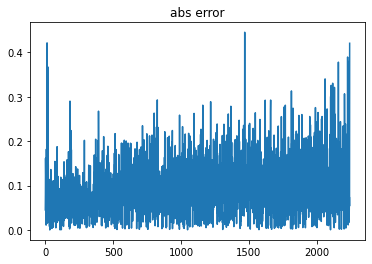

2016-12-28 00:00:00


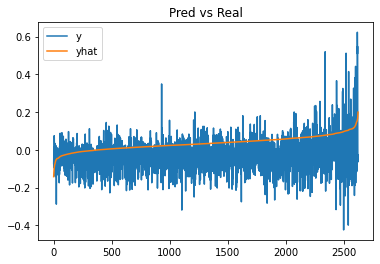

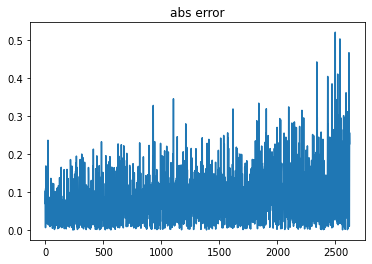

2019-10-28 00:00:00


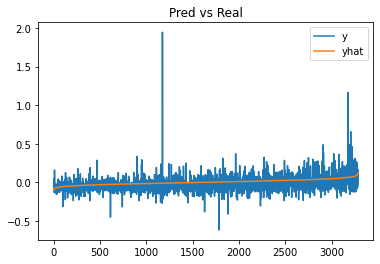

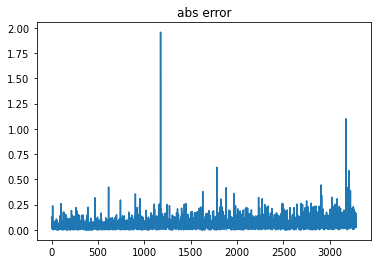

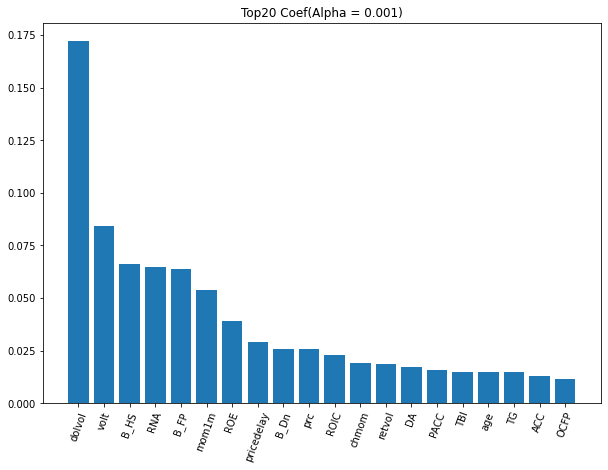

MSFE:  0.029117422211490603
R2: (Alpha = 0.001) -0.09093205553855377


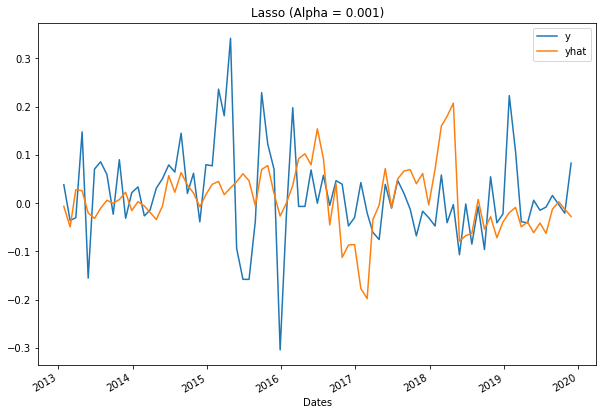

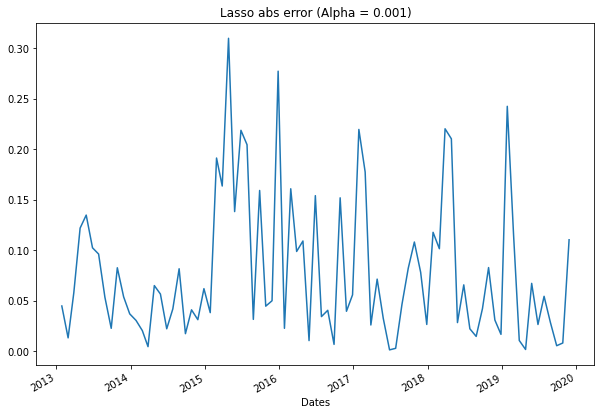

2019-05-28 00:00:00


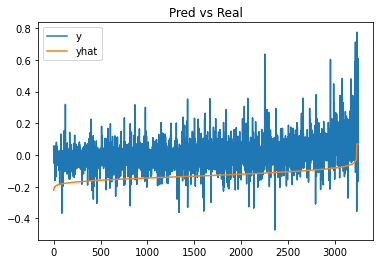

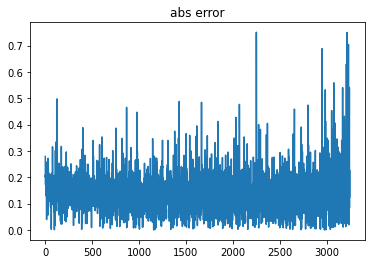

2018-08-28 00:00:00


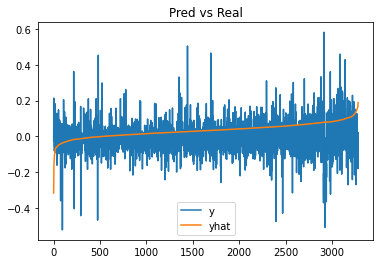

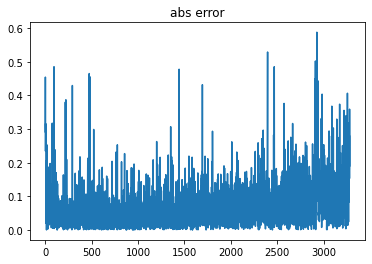

2013-01-28 00:00:00


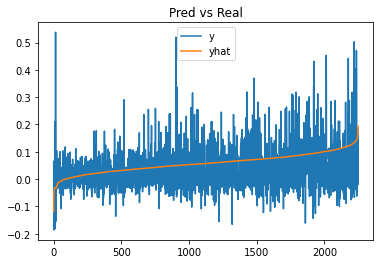

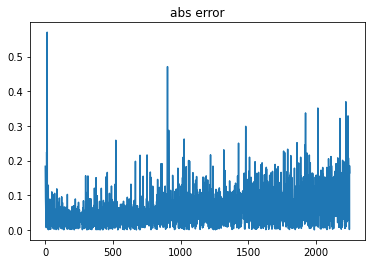

2013-03-28 00:00:00


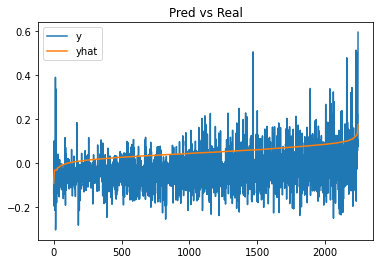

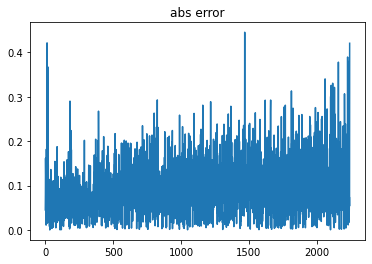

2016-12-28 00:00:00


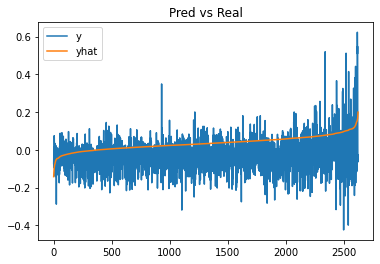

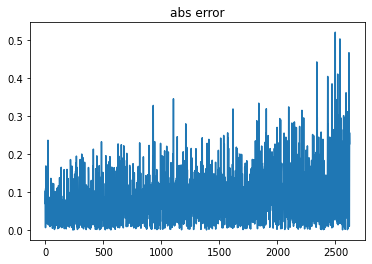

2019-10-28 00:00:00


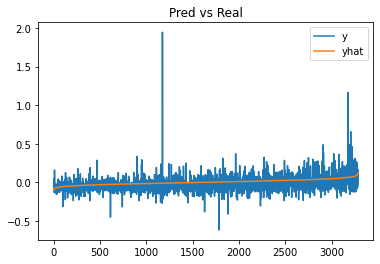

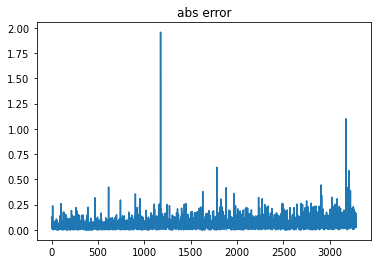

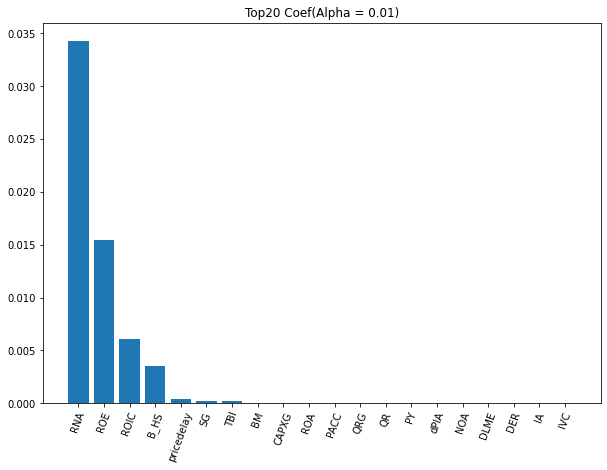

MSFE:  0.0285967542285996
R2: (Alpha = 0.01) -0.07142437423686765


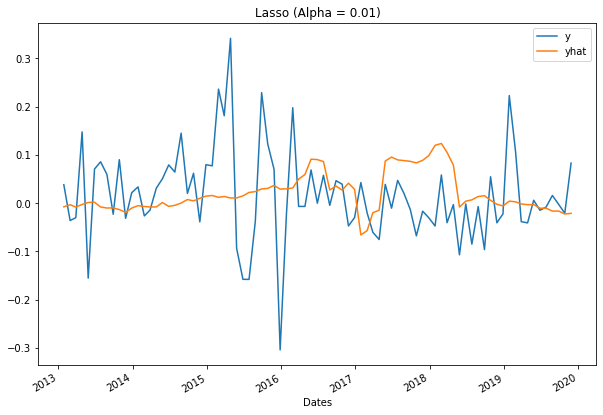

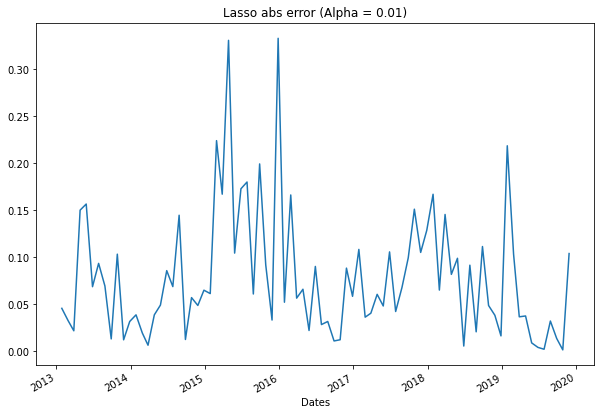

2019-05-28 00:00:00


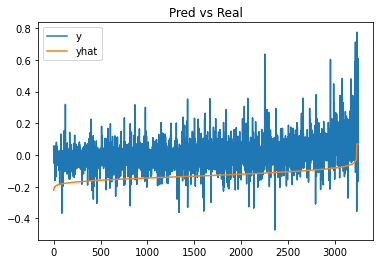

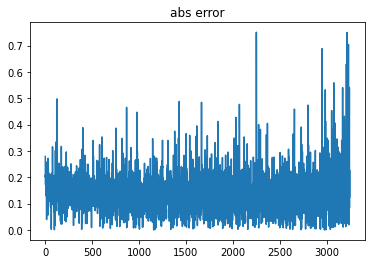

2018-08-28 00:00:00


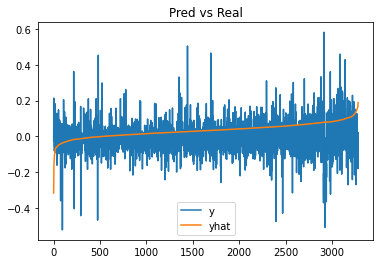

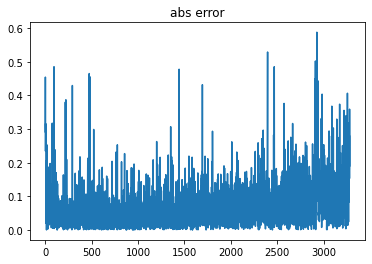

2013-01-28 00:00:00


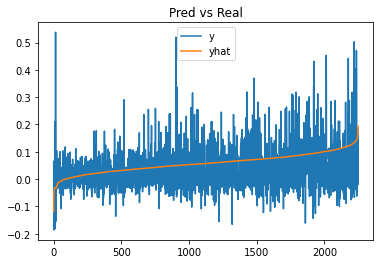

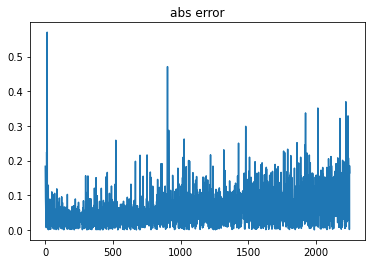

2013-03-28 00:00:00


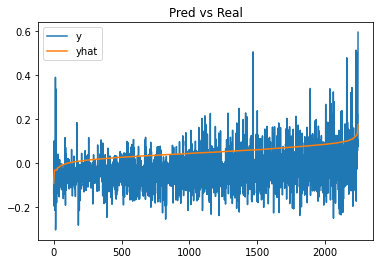

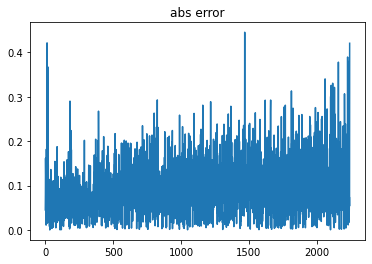

2016-12-28 00:00:00


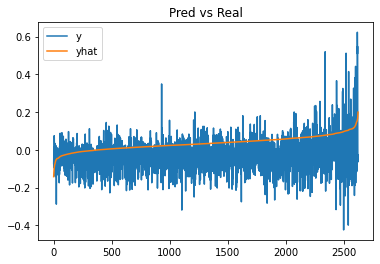

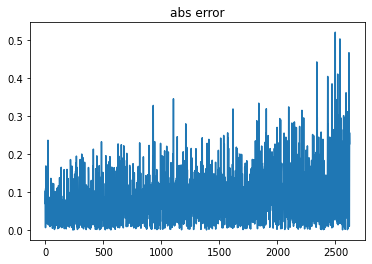

2019-10-28 00:00:00


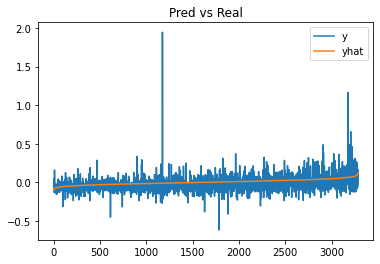

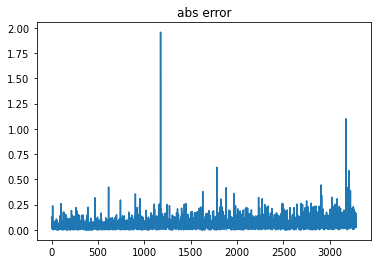

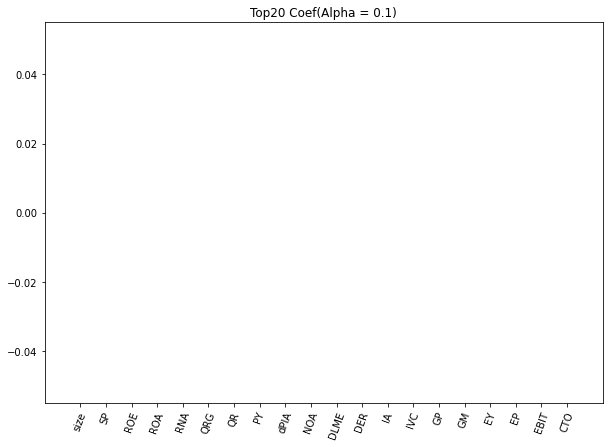

MSFE:  0.027291965451685496
R2: (Alpha = 0.1) -0.022538319279680863


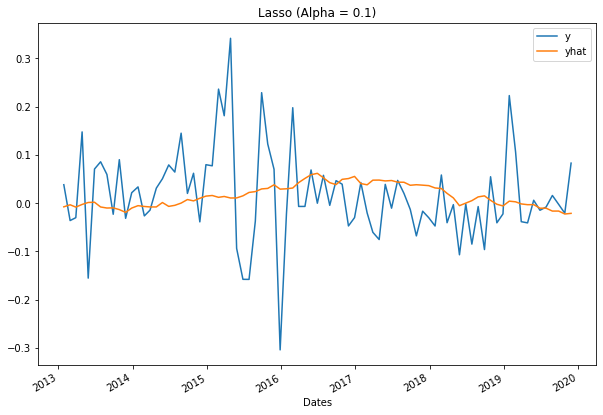

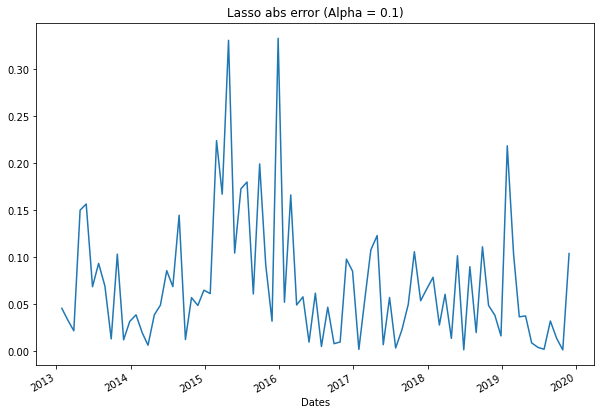

2019-05-28 00:00:00


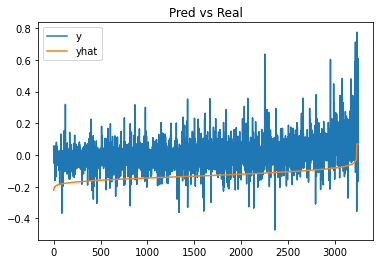

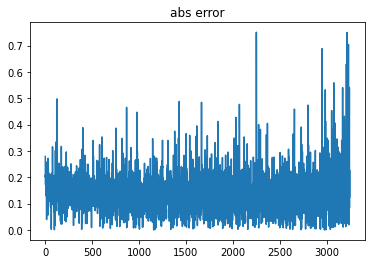

2018-08-28 00:00:00


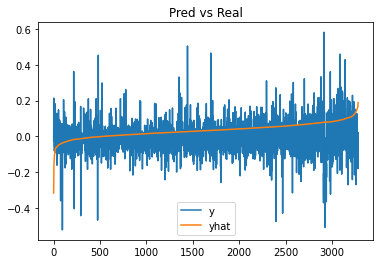

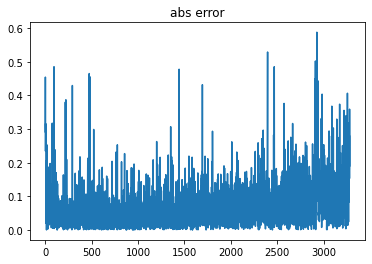

2013-01-28 00:00:00


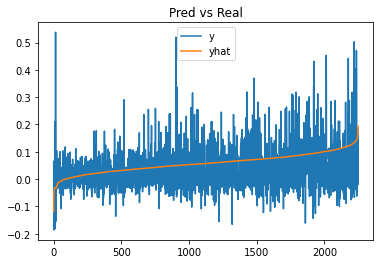

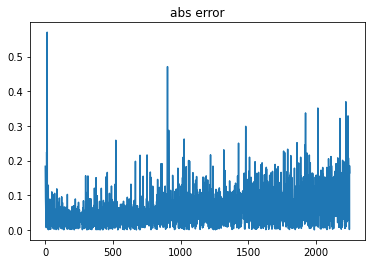

2013-03-28 00:00:00


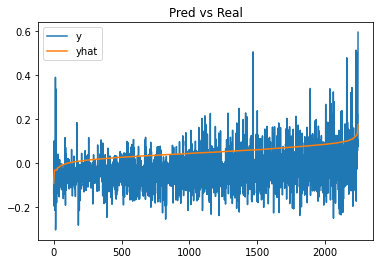

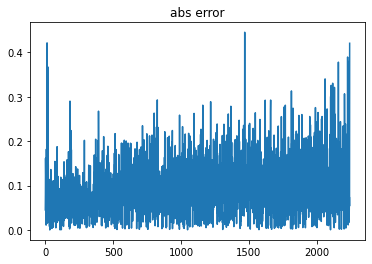

2016-12-28 00:00:00


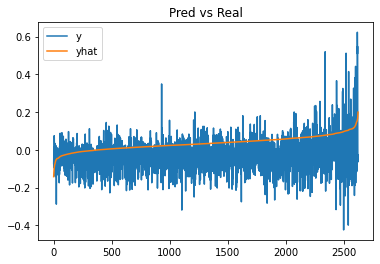

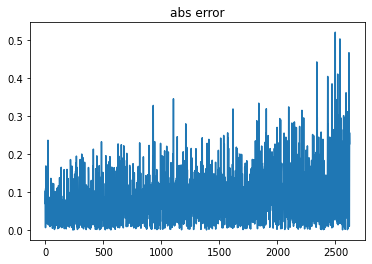

2019-10-28 00:00:00


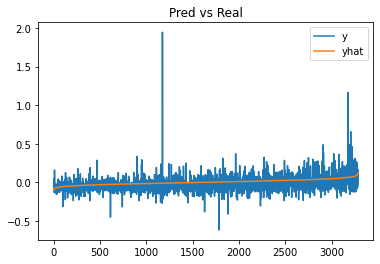

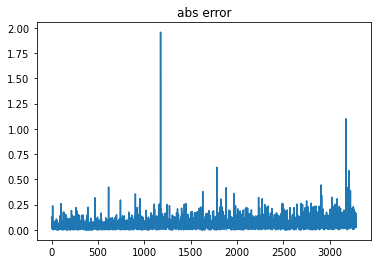

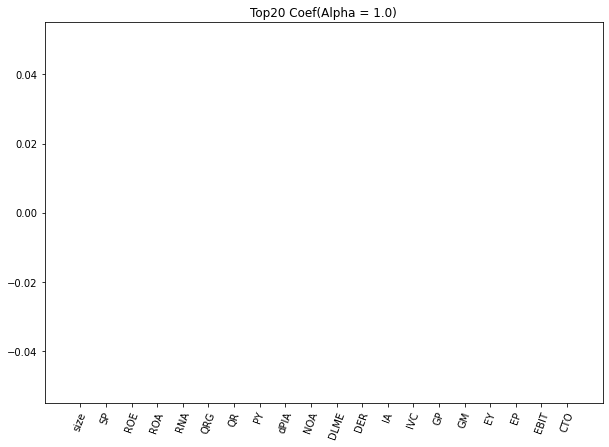

MSFE:  0.027291965451685496
R2: (Alpha = 1.0) -0.022538319279680863


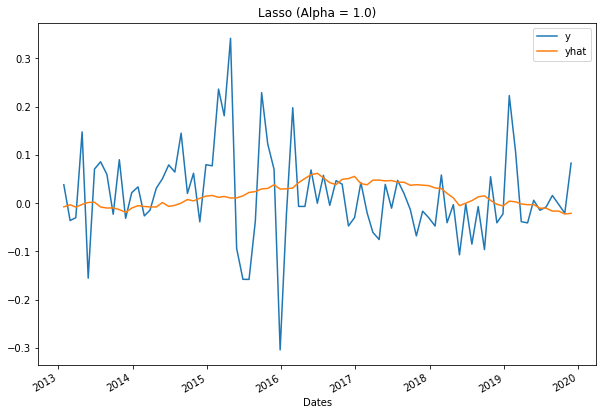

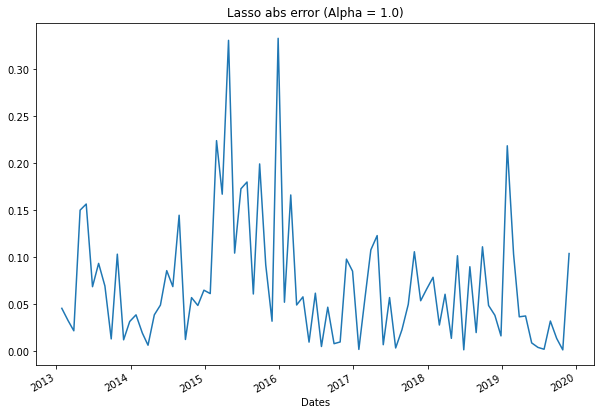

2019-05-28 00:00:00


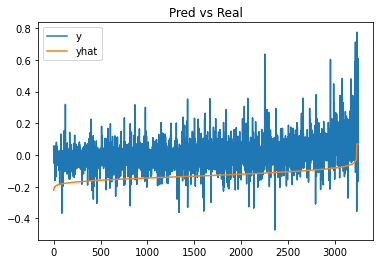

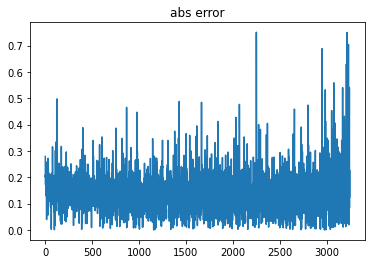

2018-08-28 00:00:00


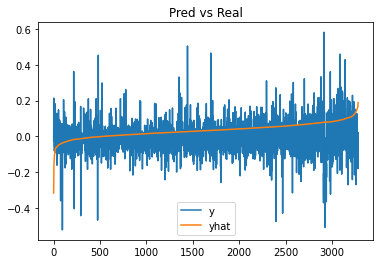

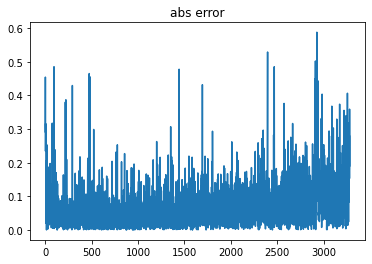

2013-01-28 00:00:00


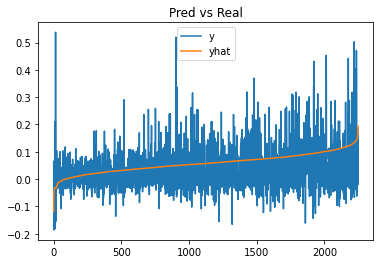

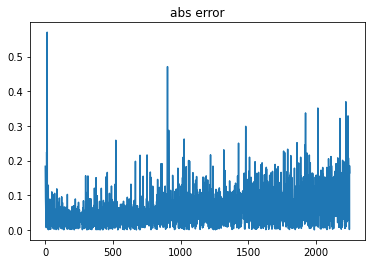

2013-03-28 00:00:00


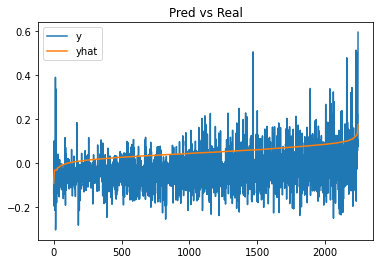

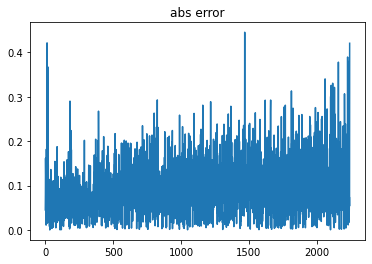

2016-12-28 00:00:00


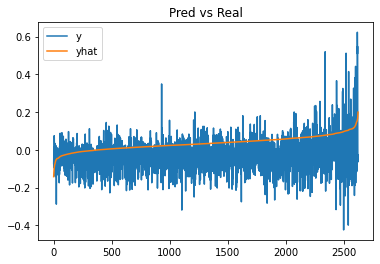

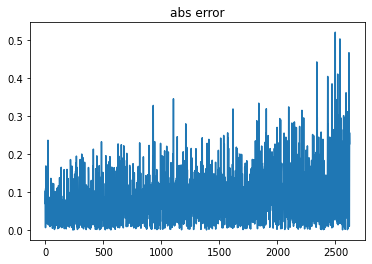

2019-10-28 00:00:00


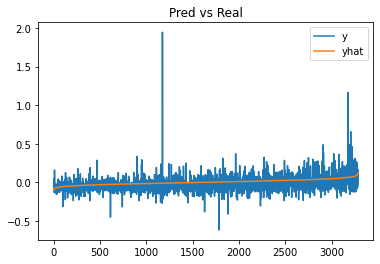

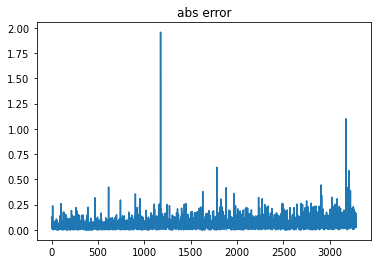

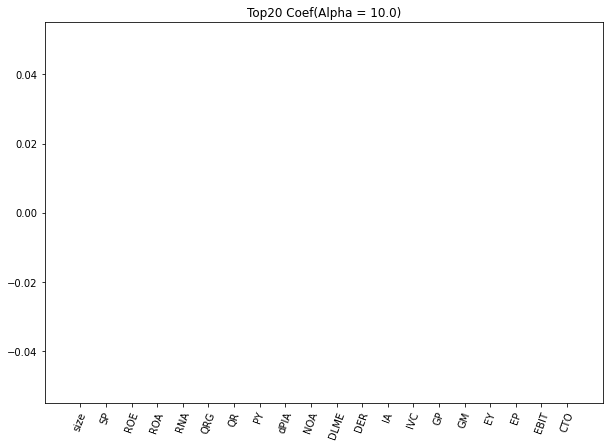

MSFE:  0.027291965451685496
R2: (Alpha = 10.0) -0.022538319279680863


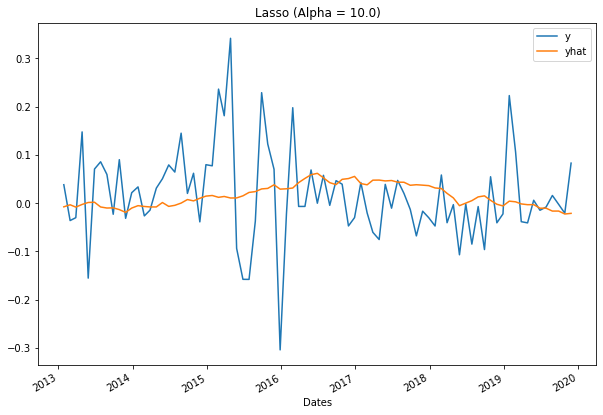

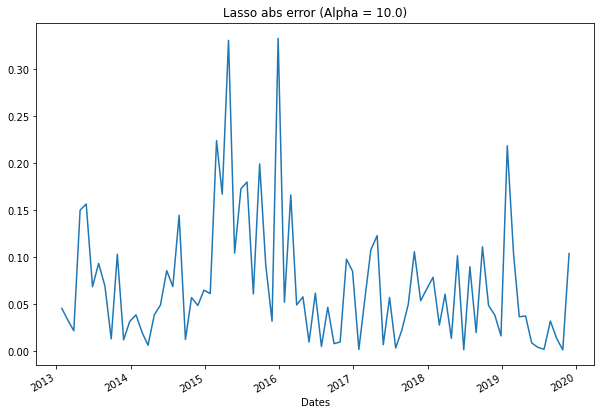

2019-05-28 00:00:00


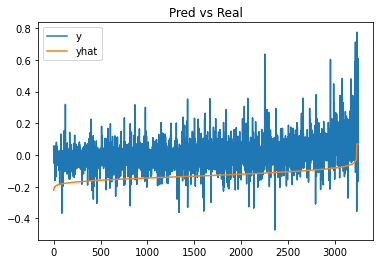

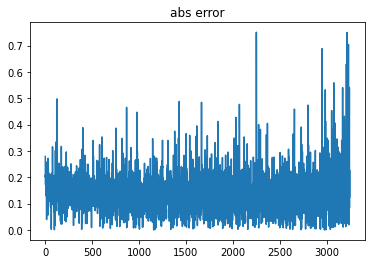

2018-08-28 00:00:00


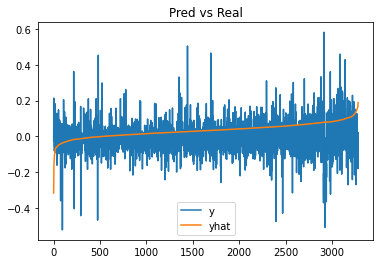

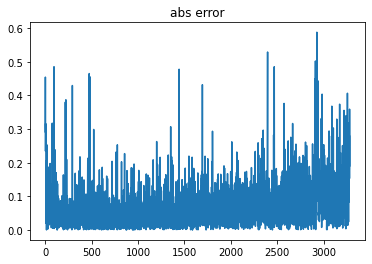

2013-01-28 00:00:00


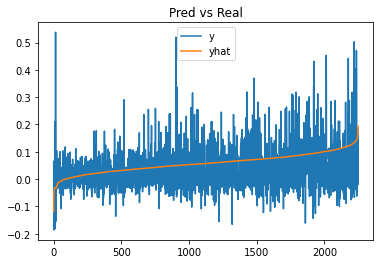

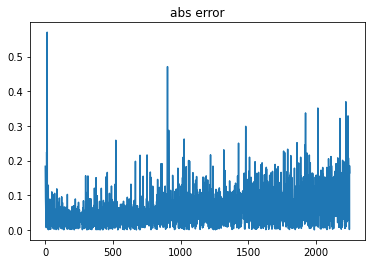

2013-03-28 00:00:00


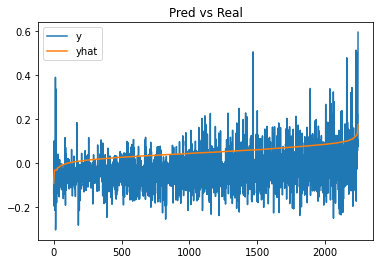

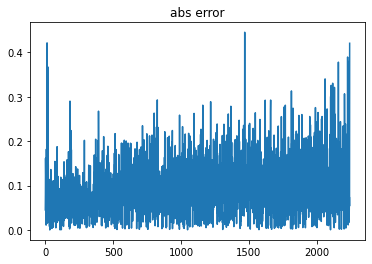

2016-12-28 00:00:00


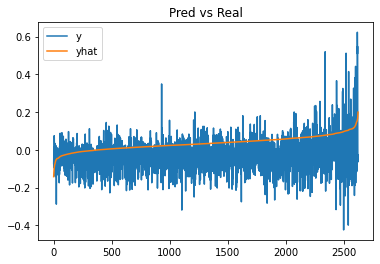

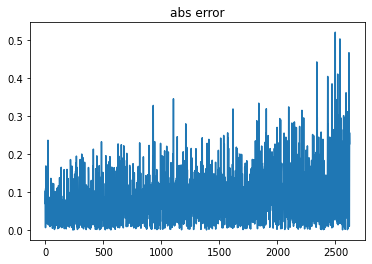

2019-10-28 00:00:00


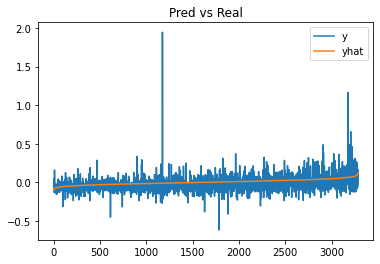

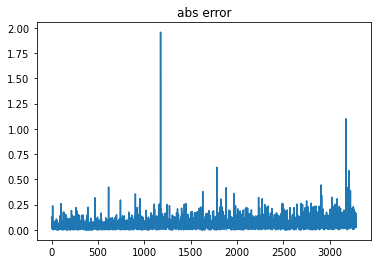

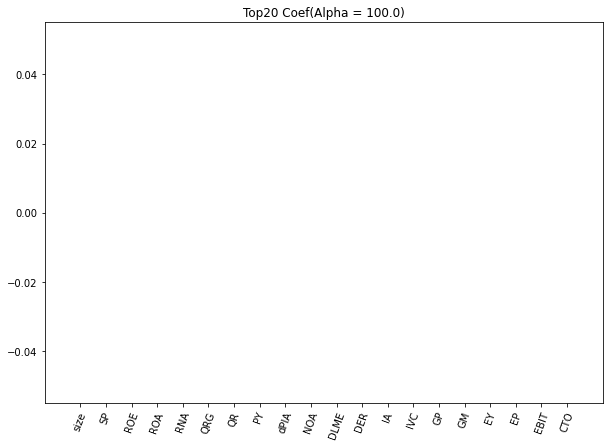

MSFE:  0.027291965451685496
R2: (Alpha = 100.0) -0.022538319279680863


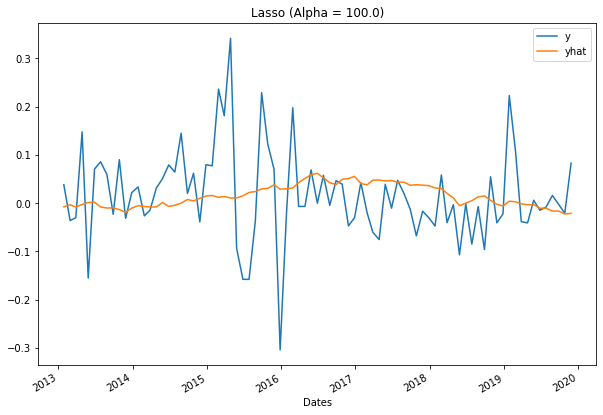

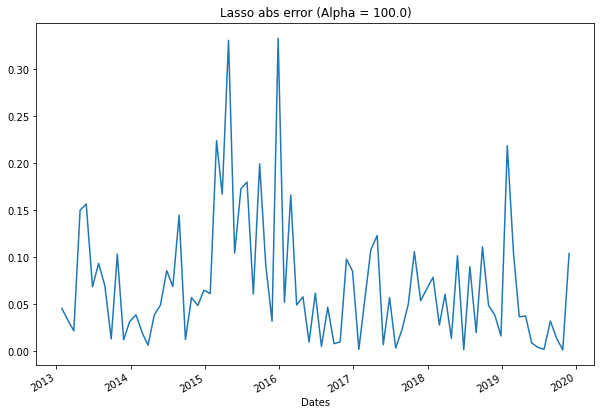

2019-05-28 00:00:00


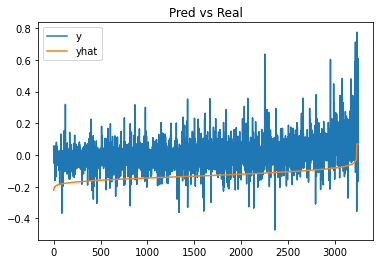

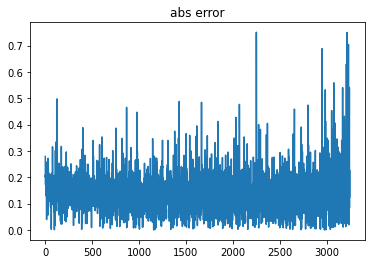

2018-08-28 00:00:00


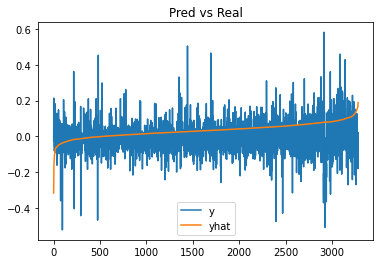

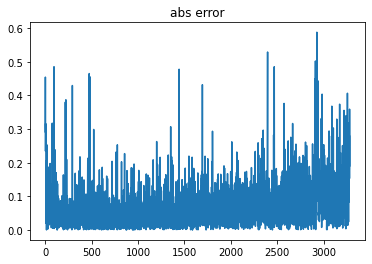

2013-01-28 00:00:00


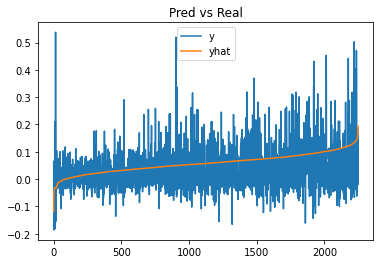

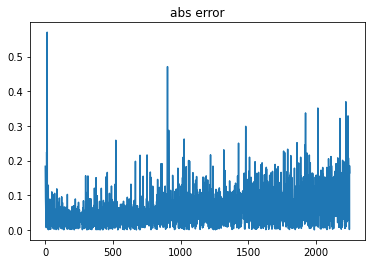

2013-03-28 00:00:00


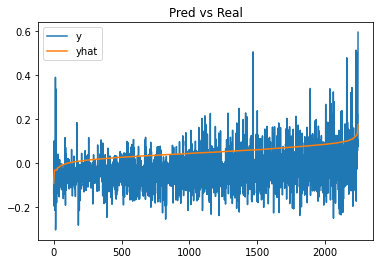

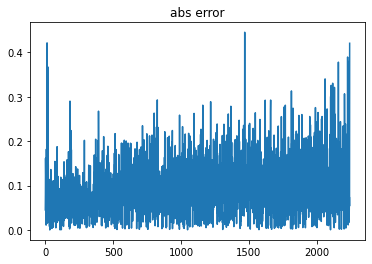

2016-12-28 00:00:00


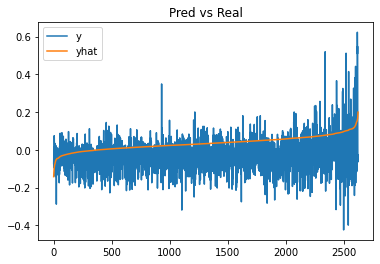

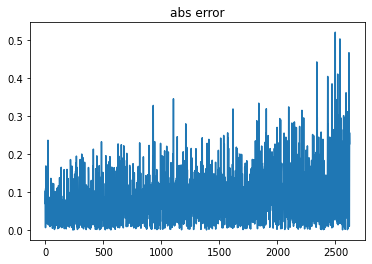

2019-10-28 00:00:00


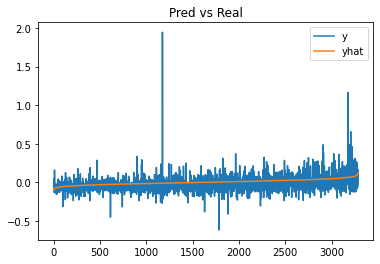

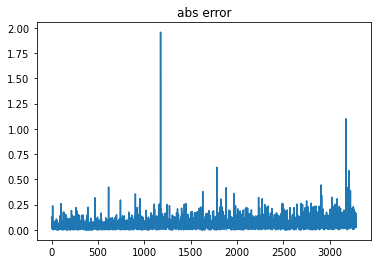

In [10]:
# deal with Lasso
all_pred = []
all_best = []
all_coef = []
for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        result_idx = i - (train_month_n + test_month_n + oos_month_n - 1)
        oos_month = all_month_list[i]
        
        temp_tuning = lasso_op[result_idx][0]
        temp_best = lasso_op[result_idx][1]
        temp_coef = lasso_op[result_idx][2]
        
        all_best.append(temp_best)
        
        temp_coef = pd.DataFrame(temp_coef).T
        temp_coef['AlphaValue'] = temp_coef.index
        temp_coef['Dates'] = oos_month
        all_coef.append(temp_coef)
        all_pred.append(temp_tuning)
        
        
all_pred = pd.concat(all_pred)
all_pred['Dates'] = [datetime.datetime(year = int(x//100),month = int(x%100),day = 28) for x in all_pred['Dates']]
all_pred = all_pred.sort_values(['AlphaValue','Dates'])
all_pred = all_pred.set_index(['AlphaValue','Dates'])
        
     
all_coef = pd.concat(all_coef)
all_coef = all_coef.sort_values(['AlphaValue','Dates'])
all_coef = all_coef.set_index(['AlphaValue','Dates'])



alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e-0, 1e1, 1e2]
for alpha_v in alphas:
    alpha_coef = all_coef.loc[alpha_v]
    plt.figure(figsize = (10,7))
    abs_coef = abs(alpha_coef).mean()
    toplot_coef = abs_coef.sort_values(ascending = False).head(20)
    plt.bar(x = list(toplot_coef.index), height = toplot_coef.values)
    plt.xticks(rotation=70)
    plt.title('Top20 Coef(Alpha = %s)'%alpha_v)
    plt.show()
    
    alpha_pred = all_pred.loc[alpha_v]
    msfe = np.sum((alpha_pred['yhat']-alpha_pred['y'])**2) / len(alpha_pred)
    print('MSFE: ', msfe)
    r2 = 1-np.sum((alpha_pred['yhat']-alpha_pred['y'])**2)/np.sum(alpha_pred['y']**2)
    print('R2: (Alpha = %s)'%alpha_v, r2)
    
    
    alpha_pred = alpha_pred.groupby('Dates').apply(lambda x: x.mean()[['y','yhat']])

    alpha_pred[['y','yhat']].plot(figsize = (10,7),title = 'Lasso (Alpha = %s)'%alpha_v)
    plt.show()
    
    abs(alpha_pred['y']- alpha_pred['yhat']).plot(figsize = (10,7),title = 'Lasso abs error (Alpha = %s)'%alpha_v)
    plt.show()  

    
    for m in head_month:
        print(m)
        m_pred = pred_toplot[pred_toplot['Dates'] == m]
        m_pred = m_pred.sort_values('yhat')
        m_pred['y'].reset_index(drop = True).plot()
        m_pred['yhat'].reset_index(drop = True).plot(title = 'Pred vs Real')
        plt.legend()
        plt.show()    
        abs(m_pred['y'] -m_pred['yhat']).reset_index(drop = True).plot(title = 'abs error')


        plt.show()
